------

-----
 <hr>






##   LOAN APPROVAL PREDICTION 

This project, completed as part of a Data Science Internship with DARLYTICS.US organized by UTIVA, covers the entire process from problem statement to model development and evaluation. After testing four different algorithms, the Oversampeled Random forest model achieved the highest accuracy of 85%, while the Oversampeled Gradient Boosting model performed poorly at 60%.

* Problem Statement
* Hypothesis Generation
* Data Collection
* Exploratory Data Analysis (EDA)
* Model Development and Evaluation
* Conclusion
---

---


##  1- Problem Statement
#### Business Problem
The business problem of this dataset is to predict whether borrowers will fully pay back their loans based on various features such as credit policy, loan purpose, interest rate, debt-to-income ratio, credit score, and others. The goal is to build a model with an accuracy of at least 80% to predict loan repayment.

#### Machine Learning Problem 

The machine learning problem of this dataset is a binary classification task. Given the features of borrowers, the goal is to predict whether or not they will fully pay back their loans. This problem involves training a model using historical data and using it to make predictions on new, unseen data. The target variable "not.fully.paid" serves as the binary label indicating whether the borrower paid back the loan in full (1) or not (0).


---

---



##  2-Hypothesis Generation


Hypothesis Generation is a process where we generate initial assumptions or hypotheses about the relationships between the features and the target variable. In the context of this dataset, some possible hypotheses could be:

Hypothesis 1: Borrowers with higher FICO credit scores are more likely to fully pay back their loans.

Hypothesis 2: Borrowers with lower debt-to-income ratios are more likely to fully pay back their loans.

Hypothesis 3: Borrowers with a longer credit history (more days with a credit line) are more likely to fully pay back their loans.

Hypothesis 4: Borrowers with lower interest rates are more likely to fully pay back their loans.

Hypothesis 5: Borrowers with lower revolving balances and utilization rates are more likely to fully pay back their loans.

These hypotheses provide initial assumptions about the potential relationships between the features and the target variable. 

They can guide the exploration and analysis of the dataset during the EDA (Exploratory Data Analysis) phase and help in formulating feature engineering strategies and selecting appropriate models.

---
---

## 3-Data Collection
 The dataset used in this project was provided by Darlytics US and sourced from lending data from 2007-2010 obtained from lendingclub.com.
 
 There are 14 columns of features and 9568 rows of records in the whole dataset
 
---

---

## 4- Exploratory Data Analysis (EDA)
We will use Python to explore the data in order to gain a better understanding of the features and target variable. We will also analyze the data to summarize their main characteristics, using various visualization techniques.

In [1]:
#WARNING
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
import pandas as pd

Loan_df = pd.read_csv('C:\\Users\\HP\\Desktop\\loan_data.csv')
Loan_df.head()
Loan_df.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1347,360.43,10.434116,22.09,677,6713.041667,13846,71.0,2,0,1,0
1,1,debt_consolidation,0.1324,253.58,11.835009,9.16,662,4298.000000,5122,18.2,2,1,0,0
2,1,debt_consolidation,0.0859,316.11,10.933107,15.49,767,6519.958333,6068,16.7,0,0,0,0
3,1,small_business,0.0714,92.82,11.512925,6.50,747,4384.000000,3021,4.8,0,1,0,0
4,1,debt_consolidation,0.0863,209.54,9.487972,9.73,727,1559.958333,6282,44.6,0,0,0,0


In [4]:
#skim(Loan_df)

In [5]:
Loan_df.shape

(9568, 14)

In [6]:
# Check for missing values in each column
missing_values = Loan_df.isnull().sum()
# Print the number of missing values in each column
print(missing_values)

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


In [7]:
Loan_df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9.568000e+03,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,0.804766,0.122645,319.181363,10.931974,12.606500,710.856605,4561.247614,1.690459e+04,46.791961,1.578700,0.163775,0.062082,0.160013
std,0.396402,0.026853,207.043337,0.614915,6.886042,37.981281,2497.890561,3.376556e+04,29.022194,2.201008,0.546410,0.262081,0.366637
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.207500,682.000000,2820.000000,3.183750e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.927556,12.665000,707.000000,4139.958333,8.593000e+03,46.250000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.995000,11.289832,17.952500,737.000000,5730.000000,1.821225e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [8]:
#Checking datatypes 
data_types = Loan_df.dtypes

print(data_types)


credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object


In [9]:
Loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9568 non-null   int64  
 1   purpose            9568 non-null   object 
 2   int.rate           9568 non-null   float64
 3   installment        9568 non-null   float64
 4   log.annual.inc     9568 non-null   float64
 5   dti                9568 non-null   float64
 6   fico               9568 non-null   int64  
 7   days.with.cr.line  9568 non-null   float64
 8   revol.bal          9568 non-null   int64  
 9   revol.util         9568 non-null   float64
 10  inq.last.6mths     9568 non-null   int64  
 11  delinq.2yrs        9568 non-null   int64  
 12  pub.rec            9568 non-null   int64  
 13  not.fully.paid     9568 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


#### Note: 
There are 3 data types in the data
* object: 
Object format means variables are categorical. Categorical variables in our dataset are: Purpose,
*  int64:
It represents the integer variables.credit.policy, fico, revol.bal, inq.last.6mths, delinq.2yrs, pub.rec, not.fully.paid is of this format.
* float64: 
It represents the variable which have some decimal values involved. They are also numerical variables. Numerical variables in our dataset are:int.rate ,installment, log.annual.inc, days.with.cr.line , revol.util.
Why Data Types are important?



---

## <u> UNIVARIANTE ANALYSIS </u>

Each Variable will be analysed individually to understand how the data is distributed..

### <u> CREDIT POLICY</u>
In this section , we will analyze the distribution of credit.policy values, which represent whether borrowers meet the credit underwriting criteria (1) or not (0). We will also calculate the frequency or percentage of borrowers who meet the credit underwriting criteria.

Frequency of credit.policy values:
1    7700
0    1868
Name: credit.policy, dtype: int64

Percentage of borrowers meeting credit underwriting criteria: 80.48%


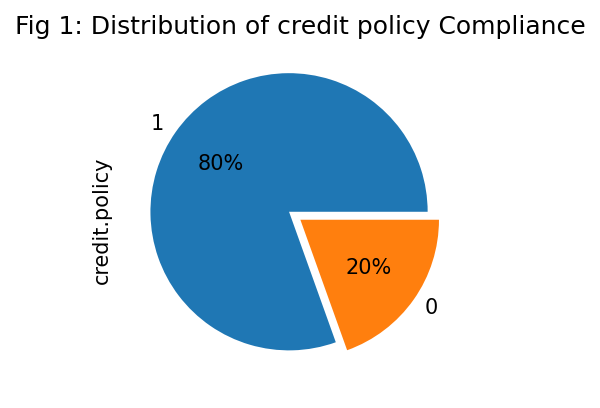

In [10]:
# Analyze the distribution of credit.policy values
credit_policy_counts = Loan_df['credit.policy'].value_counts()
credit_policy_percentage = credit_policy_counts[1] / len(Loan_df) * 100

# Print the frequency or percentage of borrowers meeting the credit underwriting criteria
print("Frequency of credit.policy values:")
print(credit_policy_counts)
print("\nPercentage of borrowers meeting credit underwriting criteria: {:.2f}%".format(credit_policy_percentage))

plt.figure(figsize=(5,3), dpi=150)
explode=[0.1,0]
credit_policy_counts =(Loan_df['credit.policy'].value_counts()).plot.pie(autopct='%1.0f%%',
                        explode=explode)
plt.title('Fig 1: Distribution of credit policy Compliance')
plt.show()

Based on the dataset, the frequency of credit.policy values is as follows:

Credit Policy 1: 7700 borrowers
Credit Policy 0: 1868 borrowers
This means that 80.48% of the borrowers meet the credit underwriting criteria, as calculated by the percentage of borrowers with credit.policy value 1 out of the total number of borrowers.

These insights give us an understanding of the distribution of credit.policy values in the dataset and the proportion of borrowers who meet the credit underwriting criteria.

### <u> LOAN PURPOSE </u>
In this section, we will explore the different loan purposes, including credit_card, debt_consolidation, educational, major_purchase, small_business, and all_other. We will determine the frequency or percentage of each loan purpose and analyze the distribution of loan purposes in the dataset.

In [11]:
# Calculate the frequency of different loan purposes
purpose_counts = Loan_df['purpose'].value_counts()

# Calculate the percentage of different loan purposes
purpose_percentage = purpose_counts / len(Loan_df) * 100

# Print the frequency and percentage of loan purposes
print("Frequency of different loan purposes:")
print(purpose_counts)
print()
print("Percentage of different loan purposes:")
print(purpose_percentage)


Frequency of different loan purposes:
debt_consolidation    3952
all_other             2330
credit_card           1259
home_improvement       628
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

Percentage of different loan purposes:
debt_consolidation    41.304348
all_other             24.352007
credit_card           13.158445
home_improvement       6.563545
small_business         6.469482
major_purchase         4.567308
educational            3.584866
Name: purpose, dtype: float64


Loan Purposes:

Debt Consolidation: 3952 (41.30%)
All Other: 2330 (24.35%)
Credit Card: 1259 (13.16%)
Home Improvement: 628 (6.56%)
Small Business: 619 (6.47%)
Major Purchase: 437 (4.57%)
Educational: 343 (3.58%)
These numbers provide insights into the distribution of loan purposes in the dataset, highlighting the most common purposes and their respective proportions.

Frequency of different loan purposes:
debt_consolidation    3952
all_other             2330
credit_card           1259
home_improvement       628
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

Percentage of different loan purposes:
debt_consolidation    41.304348
all_other             24.352007
credit_card           13.158445
home_improvement       6.563545
small_business         6.469482
major_purchase         4.567308
educational            3.584866
Name: purpose, dtype: float64


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'debt_consolidation'),
  Text(1, 0, 'small_business'),
  Text(2, 0, 'major_purchase'),
  Text(3, 0, 'all_other'),
  Text(4, 0, 'credit_card'),
  Text(5, 0, 'home_improvement'),
  Text(6, 0, 'educational')])

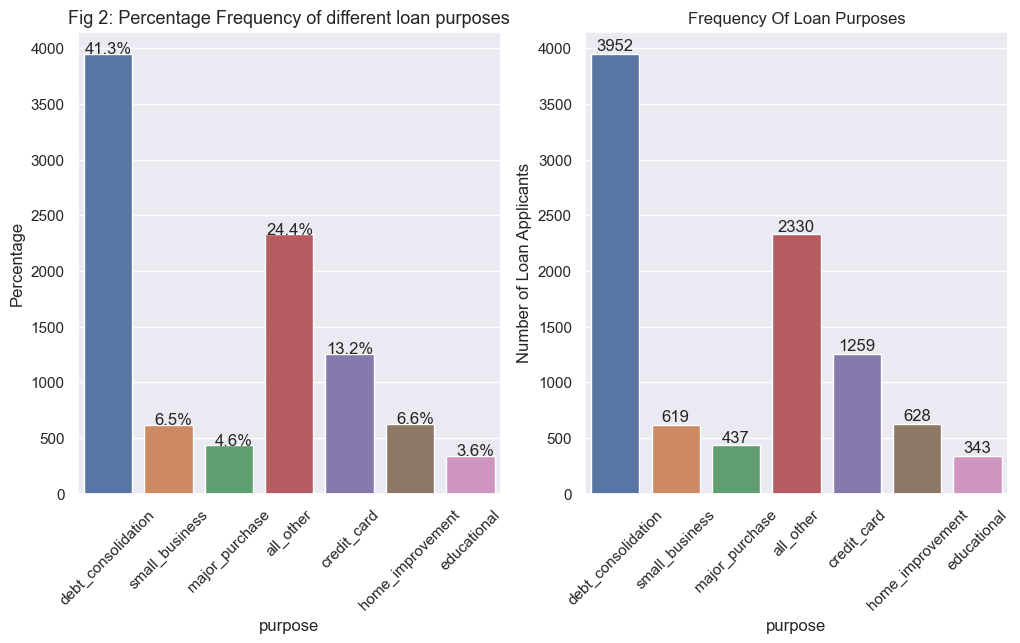

In [12]:
# Calculate the frequency of different loan purposes
purpose_counts = Loan_df['purpose'].value_counts()

# Calculate the percentage of different loan purposes
purpose_percentage = purpose_counts / len(Loan_df) * 100

# Print the frequency and percentage of loan purposes
print("Frequency of different loan purposes:")
print(purpose_counts)
print()
print("Percentage of different loan purposes:")
print(purpose_percentage)

# Plot the percentage of different loan purposes
sns.set(style="darkgrid")
plt.figure(figsize=(12,6),dpi=100)
plt.subplot(1,2,1)
total = float(len(Loan_df))
ax = sns.countplot(x='purpose', data=Loan_df)
plt.title('Fig 2: Percentage Frequency of different loan purposes', fontsize=13)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
total = float(len(Loan_df))

ax=sns.countplot(x='purpose', data=Loan_df
               )
for i in ax.containers:
    ax.bar_label(i,)
plt.ylabel('Number of Loan Applicants')
plt.title('Frequency Of Loan Purposes')
plt.xticks(rotation=45)


These results provide the frequency and percentage of different loan purposes in the dataset. It shows the distribution of loan purposes and the relative importance of each category.

### <u> Interest Rate </u> 
In this section, we will examine the distribution of interest rates for the loans. We will calculate summary statistics such as the mean, median, and standard deviation to gain insights into the range and variability of interest rates.

Summary Statistics for Interest Rates:
Mean: 0.12264486831103562
Median: 0.1221
Standard Deviation: 0.02685291456036248



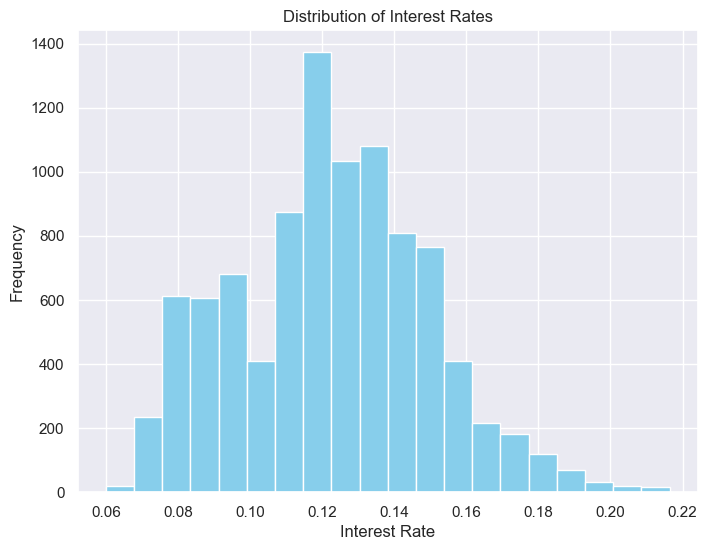

In [13]:
import matplotlib.pyplot as plt

# Calculate summary statistics
mean_rate = Loan_df['int.rate'].mean()
median_rate = Loan_df['int.rate'].median()
std_rate = Loan_df['int.rate'].std()

# Print summary statistics
print("Summary Statistics for Interest Rates:")
print("Mean:", mean_rate)
print("Median:", median_rate)
print("Standard Deviation:", std_rate)
print()

# Create a histogram of interest rates
plt.figure(figsize=(8, 6))
plt.hist(Loan_df['int.rate'], bins=20, color='skyblue')
plt.xlabel("Interest Rate")
plt.ylabel("Frequency")
plt.title("Distribution of Interest Rates")
plt.show()


Minimum:0.06
Mean:0.12
Maximum:0.22
Std_Dev:0.03



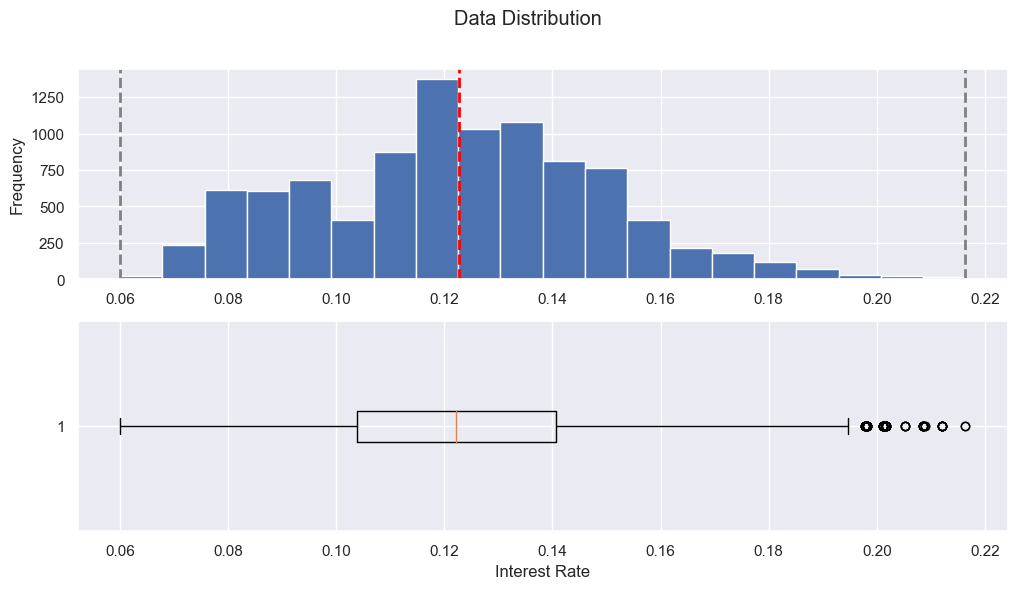

In [14]:
# Get the variable to examine
var_data = Loan_df['int.rate']
# Get statistics
min_val = var_data.min()
max_val = var_data.max()
mean_val = var_data.mean()
std_rate = Loan_df['int.rate'].std()

print('Minimum:{:.2f}\nMean:{:.2f}\nMaximum:{:.2f}\nStd_Dev:{:.2f}\n'.format(min_val,mean_val,max_val,std_rate))

    # Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (12,6))

    # Plot the histogram   
ax[0].hist(var_data, bins=20)
ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
ax[0].axvline(x=mean_val, color = 'red', linestyle='dashed', linewidth = 2)
ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
ax[1].boxplot(var_data, vert=False)
ax[1].set_xlabel('Interest Rate')

    # Add a title to the Figure
fig.suptitle('Data Distribution')

    # Show the figure
plt.show()

These statistics provide insights into the central tendency and variability of the interest rates in the dataset. The mean represents the average interest rate, while the median represents the middle value. The standard deviation measures the spread or dispersion of the interest rates around the mean.

### <u> INSTALLEMENT </u>
We will analyze the distribution of monthly installments in the dataset and calculate summary statistics to understand the range and central tendency of these installments.

In [15]:
import matplotlib.pyplot as plt

# Calculate summary statistics
mean_installment = Loan_df['installment'].mean()
median_installment = Loan_df['installment'].median()
min_installment = Loan_df['installment'].min()
max_installment = Loan_df['installment'].max()
std_installment = Loan_df['installment'].std()

# Print summary statistics
print("Summary Statistics for Monthly Installments:")
print("Mean:", mean_installment)
print("Median:", median_installment)
print("Minimum:", min_installment)
print("Maximum:", max_installment)
print("Standard Deviation:", std_installment)
print()



Summary Statistics for Monthly Installments:
Mean: 319.18136287625487
Median: 268.95
Minimum: 15.67
Maximum: 940.14
Standard Deviation: 207.04333697682273



Summary Statistics for Monthly Installments:
Mean: 319.18136287625487
Minimum: 15.67
Maximum: 940.14
Standard Deviation: 207.04333697682273



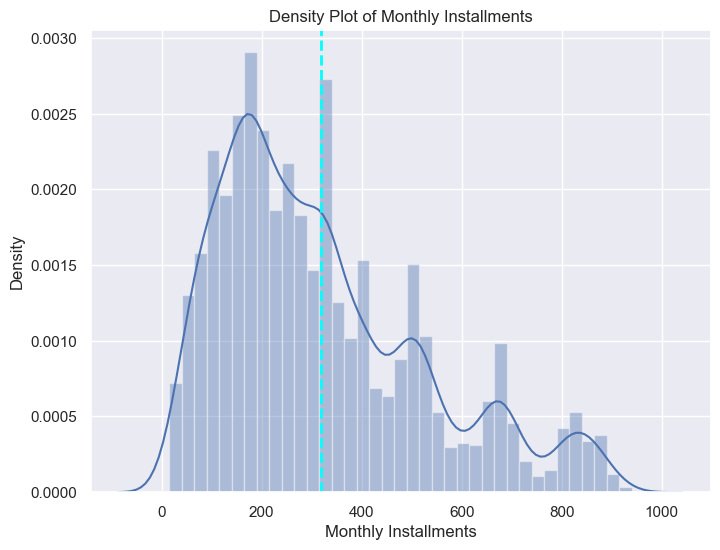

In [16]:
# Get the variable to examine
var_data2 = Loan_df['installment']
# Calculate summary statistics
mean_installment = var_data2.mean()
min_installment = var_data2.min()
max_installment = var_data2.max()
std_installment = var_data2.std()

    
# Print summary statistics
print("Summary Statistics for Monthly Installments:")
print("Mean:", mean_installment)
print("Minimum:", min_installment)
print("Maximum:", max_installment)
print("Standard Deviation:", std_installment)
print()

# Create a density plot with histogram and line
plt.figure(figsize=(8, 6))
sns.distplot(Loan_df['installment'], kde=True, hist=True)
plt.axvline(x=var_data2.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
plt.xlabel("Monthly Installments")
plt.ylabel("Density")
plt.title("Density Plot of Monthly Installments")
plt.show()


These statistics provide insights into the range and central tendency of the monthly installments. The mean represents the average installment amount, while the median represents the middle value. The minimum and maximum values indicate the range of installment amounts, and the standard deviation measures the dispersion or variability around the mean.

### <u> Log annual Income </u>

In this section , we will examine the distribution of the natural log of annual income. We will calculate summary statistics to gain insights into the income levels of borrowers.

Minimum:7.55
Mean:10.93
Maximum:14.53
Std_Dev:0.61



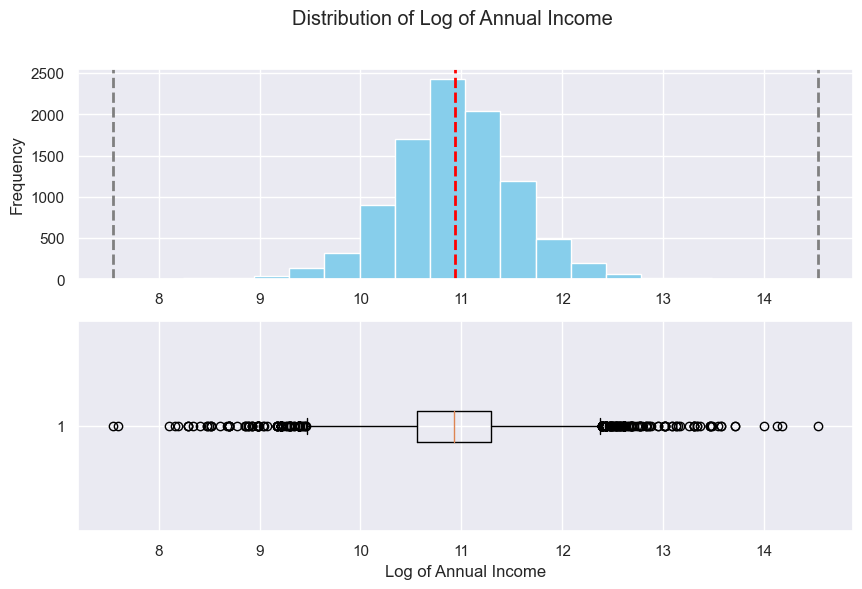

In [17]:
# Get the variable to examine
var_data3 = Loan_df['log.annual.inc']
# Get statistics
min_val = var_data3.min()
max_val = var_data3.max()
mean_val = var_data3.mean()
std_rate = Loan_df['log.annual.inc'].std()

print('Minimum:{:.2f}\nMean:{:.2f}\nMaximum:{:.2f}\nStd_Dev:{:.2f}\n'.format(min_val,mean_val,max_val,std_rate))

    # Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (10,6))

    # Plot the histogram   
ax[0].hist(var_data3, bins=20, color='skyblue')
ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
ax[0].axvline(x=mean_val, color = 'red', linestyle='dashed', linewidth = 2)
ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
ax[1].boxplot(var_data3, vert=False)
ax[1].set_xlabel('Log of Annual Income')

    # Add a title to the Figure
fig.suptitle('Distribution of Log of Annual Income')


plt.show()

These statistics provide insights into the income levels of borrowers in the dataset. The mean and median values give you an idea of the central tendency of the log annual income, while the minimum and maximum values indicate the range of income values. The standard deviation represents the dispersion or variability of the log income values around the mean.

### <u> Debt to income ratio <u/>
    
In the dataset, we will examine the distribution of debt-to-income ratios, which provide insights into the borrowers' financial obligations. We will also calculate summary statistics to gain a better understanding of the borrowers' financial situation.


Summary Statistics for Debt-to-Income Ratio (dti):
Mean: 12.606499790969917
Median: 12.665
Minimum: 0.0
Maximum: 29.96
Standard Deviation: 6.886042430690465



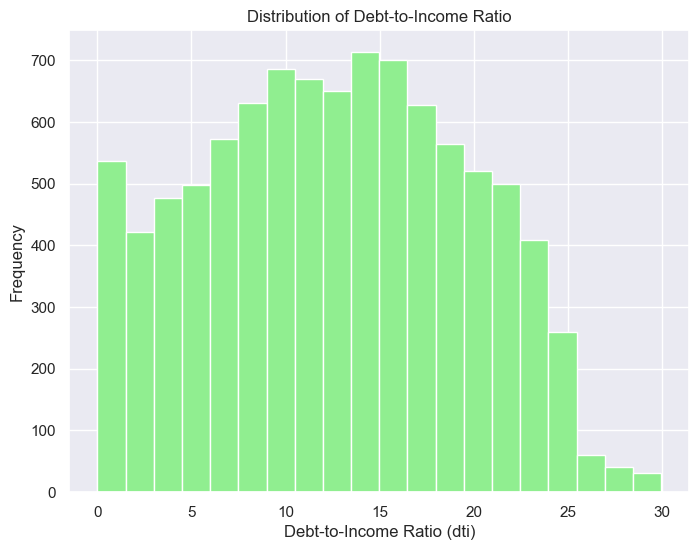

In [18]:
import matplotlib.pyplot as plt

# Calculate summary statistics
mean_dti = Loan_df['dti'].mean()
median_dti = Loan_df['dti'].median()
min_dti = Loan_df['dti'].min()
max_dti = Loan_df['dti'].max()
std_dti = Loan_df['dti'].std()

# Print summary statistics
print("Summary Statistics for Debt-to-Income Ratio (dti):")
print("Mean:", mean_dti)
print("Median:", median_dti)
print("Minimum:", min_dti)
print("Maximum:", max_dti)
print("Standard Deviation:", std_dti)
print()

# Create a histogram of the debt-to-income ratios
plt.figure(figsize=(8, 6))
plt.hist(Loan_df['dti'], bins=20, color='lightgreen')
plt.xlabel("Debt-to-Income Ratio (dti)")
plt.ylabel("Frequency")
plt.title("Distribution of Debt-to-Income Ratio")
plt.show()


Based on the summary statistics for the debt-to-income ratio (dti), we can observe the following:

The mean dti is approximately 12.61, indicating an average debt-to-income ratio among the borrowers.
The median dti is 12.67, which is close to the mean, suggesting a relatively symmetric distribution.
The minimum dti is 0.0, indicating that there are borrowers with no debt relative to their income.
The maximum dti is 29.96, representing the highest debt-to-income ratio in the dataset.
The standard deviation of dti is 6.89, suggesting a moderate amount of variability in the debt-to-income ratios.
These summary statistics provide insights into the borrowers' financial obligations and help in understanding the overall distribution of debt-to-income ratios in the dataset.

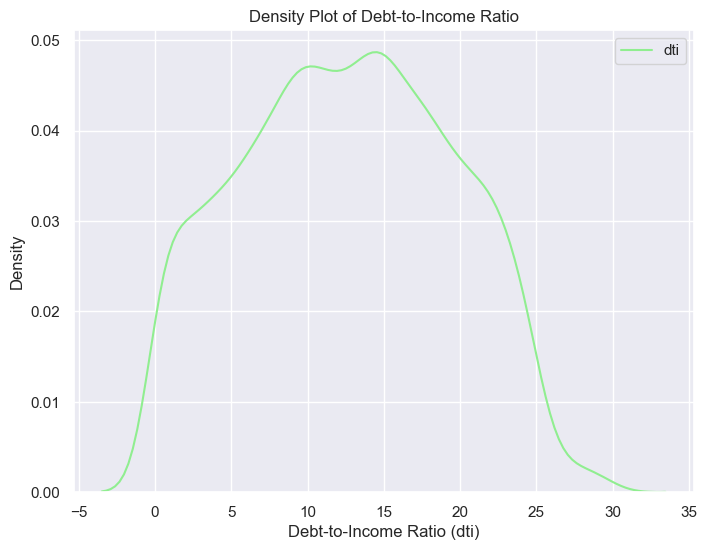

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a density plot of the debt-to-income ratios
plt.figure(figsize=(8, 6))
sns.kdeplot(data=Loan_df['dti'], color='lightgreen')
plt.xlabel("Debt-to-Income Ratio (dti)")
plt.ylabel("Density")
plt.title("Density Plot of Debt-to-Income Ratio")
plt.show()


### <u> FICO CREDIT SCORES </u>

We will examine the distribution of FICO credit scores in the dataset. By calculating summary statistics, we will explore any patterns or outliers associated with FICO credit scores.

Summary Statistics for FICO Credit Scores:
Mean: 710.8566053511705
Median: 707.0
Minimum: 612
Maximum: 827
Standard Deviation: 37.98128147528239



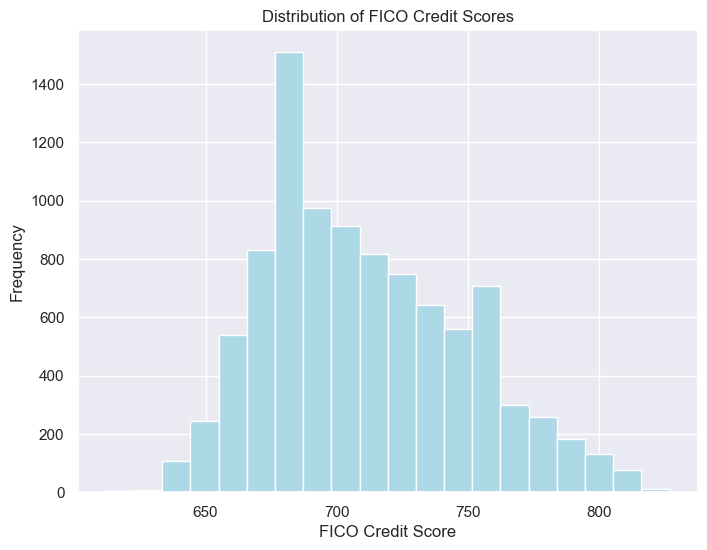

In [20]:
import matplotlib.pyplot as plt

# Calculate summary statistics
mean_fico = Loan_df['fico'].mean()
median_fico = Loan_df['fico'].median()
min_fico = Loan_df['fico'].min()
max_fico = Loan_df['fico'].max()
std_fico = Loan_df['fico'].std()

# Print summary statistics
print("Summary Statistics for FICO Credit Scores:")
print("Mean:", mean_fico)
print("Median:", median_fico)
print("Minimum:", min_fico)
print("Maximum:", max_fico)
print("Standard Deviation:", std_fico)
print()

# Create a histogram of the FICO credit scores
plt.figure(figsize=(8, 6))
plt.hist(Loan_df['fico'], bins=20, color='lightblue')
plt.xlabel("FICO Credit Score")
plt.ylabel("Frequency")
plt.title("Distribution of FICO Credit Scores")
plt.show()


These statistics provide an overview of the distribution of FICO credit scores among the borrowers. The mean and median scores indicate the average and central tendency of the scores, respectively. The minimum and maximum values represent the range of scores observed in the dataset. The standard deviation indicates the dispersion or variability of the credit scores around the mean.

### <u> Days the borrower has had a credit line. </u>

In the dataset, we will examine the credit history of borrowers by analyzing the distribution of the number of days they have had a credit line. We will also calculate summary statistics to gain insights into the credit history of borrowers.

Summary Statistics for Days with Credit Line:
Mean: 4561.247613575434
Median: 4139.958333
Minimum: 178.95833330000002
Maximum: 17639.95833
Standard Deviation: 2497.8905606178064



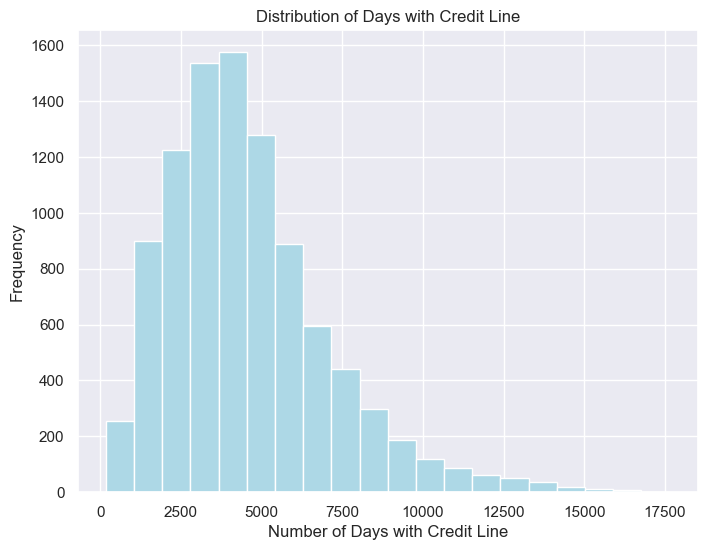

In [21]:
import matplotlib.pyplot as plt

# Calculate summary statistics
mean_days = Loan_df['days.with.cr.line'].mean()
median_days = Loan_df['days.with.cr.line'].median()
min_days = Loan_df['days.with.cr.line'].min()
max_days = Loan_df['days.with.cr.line'].max()
std_days = Loan_df['days.with.cr.line'].std()

# Print summary statistics
print("Summary Statistics for Days with Credit Line:")
print("Mean:", mean_days)
print("Median:", median_days)
print("Minimum:", min_days)
print("Maximum:", max_days)
print("Standard Deviation:", std_days)
print()

# Create a histogram of the number of days with a credit line
plt.figure(figsize=(8, 6))
plt.hist(Loan_df['days.with.cr.line'], bins=20, color='lightblue')
plt.xlabel("Number of Days with Credit Line")
plt.ylabel("Frequency")
plt.title("Distribution of Days with Credit Line")
plt.show()


The summary statistics for the number of days the borrower has had a credit line (days.with.cr.line) are as follows:

Mean: 4561.25

Median: 4139.96

Minimum: 178.96

Maximum: 17639.96

Standard Deviation: 2497.89

These statistics provide information about the average length of time borrowers have had a credit line, the range of credit line durations, and the variability in the data.

### <u> The borrower's revolving balance </u>
In this section , we will examine the distribution of revolving balances, which represents the borrowers' outstanding credit card debts. We will also calculate summary statistics to gain insights into the borrowers' credit card debt levels.

Summary Statistics for Revolving Balances:
Mean: 16904.593018394648
Median: 8593.0
Minimum: 0
Maximum: 1207359
Standard Deviation: 33765.5626332623



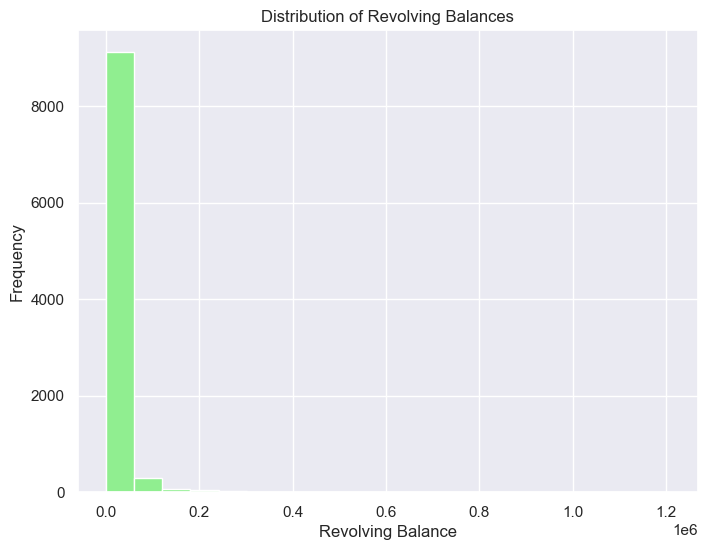

In [22]:
import matplotlib.pyplot as plt

# Calculate summary statistics
mean_revol_bal = Loan_df['revol.bal'].mean()
median_revol_bal = Loan_df['revol.bal'].median()
min_revol_bal = Loan_df['revol.bal'].min()
max_revol_bal = Loan_df['revol.bal'].max()
std_revol_bal = Loan_df['revol.bal'].std()

# Print summary statistics
print("Summary Statistics for Revolving Balances:")
print("Mean:", mean_revol_bal)
print("Median:", median_revol_bal)
print("Minimum:", min_revol_bal)
print("Maximum:", max_revol_bal)
print("Standard Deviation:", std_revol_bal)
print()

# Create a histogram of revolving balances
plt.figure(figsize=(8, 6))
plt.hist(Loan_df['revol.bal'], bins=20, color='lightgreen')
plt.xlabel("Revolving Balance")
plt.ylabel("Frequency")
plt.title("Distribution of Revolving Balances")
plt.show()


These statistics provide insights into the distribution of borrowers' outstanding credit card debts. The mean revolving balance indicates the average amount owed by borrowers, while the median represents the middle value. The minimum and maximum values show the range of revolving balances observed in the dataset. The standard deviation measures the variability or dispersion of revolving balances around the mean

### <u> The borrower's revolving line utilization rate </u>

In this section, we will analyze the revolving line utilization rates, which represent how borrowers utilize their available credit. We will examine the distribution of these rates and calculate summary statistics to gain insights into borrowers' credit utilization habits.

Summary Statistics for Revolving Line Utilization Rate:
Mean: 46.79196070234114
Median: 46.25
Minimum: 0.0
Maximum: 119.0
Standard Deviation: 29.022194107473677



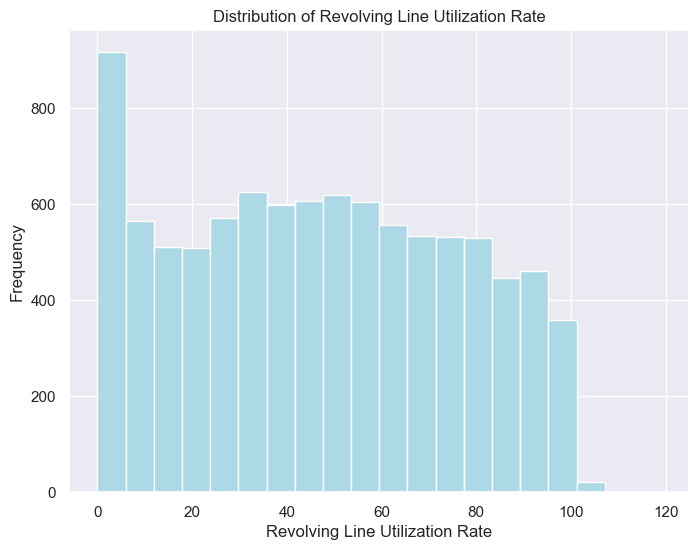

In [23]:
import matplotlib.pyplot as plt

# Calculate summary statistics
mean_utilization = Loan_df['revol.util'].mean()
median_utilization = Loan_df['revol.util'].median()
min_utilization = Loan_df['revol.util'].min()
max_utilization = Loan_df['revol.util'].max()
std_utilization = Loan_df['revol.util'].std()

# Print summary statistics
print("Summary Statistics for Revolving Line Utilization Rate:")
print("Mean:", mean_utilization)
print("Median:", median_utilization)
print("Minimum:", min_utilization)
print("Maximum:", max_utilization)
print("Standard Deviation:", std_utilization)
print()

# Create a histogram of the revolving line utilization rates
plt.figure(figsize=(8, 6))
plt.hist(Loan_df['revol.util'], bins=20, color='lightblue')
plt.xlabel("Revolving Line Utilization Rate")
plt.ylabel("Frequency")
plt.title("Distribution of Revolving Line Utilization Rate")
plt.show()


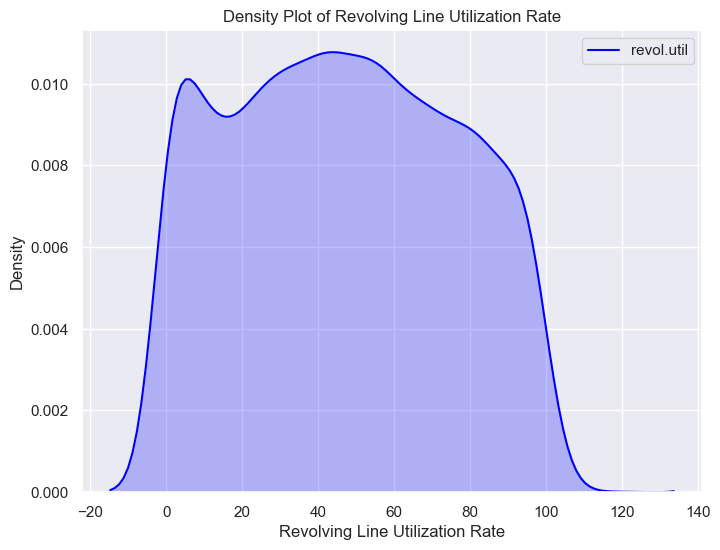

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the density plot
sns.kdeplot(data=Loan_df['revol.util'], color='blue', shade=True)

# Set the labels and title
plt.xlabel('Revolving Line Utilization Rate')
plt.ylabel('Density')
plt.title('Density Plot of Revolving Line Utilization Rate')

# Show the plot
plt.show()


These statistics provide an overview of the distribution of the revolving line utilization rate. The mean and median values indicate the average and middle values, respectively. The minimum and maximum values represent the range of the utilization rate, while the standard deviation gives an idea of the variability or spread of the data.

### <u> The borrower's number of inquiries by creditors in the last 6 months </u>

We will examine the distributions and frequencies of borrower inquiries, delinquencies, and derogatory public records in the dataset. This analysis will provide insights into the occurrence and patterns of borrower inquiries, delinquencies, and derogatory public records.

Frequency of Borrower Inquiries (inq.last.6mths):
0     3631
1     2458
2     1384
3      864
4      475
5      278
6      165
7      100
8       72
9       47
10      23
11      15
12      15
15       9
13       6
14       6
18       4
16       3
24       2
19       2
17       2
27       1
28       1
25       1
32       1
20       1
33       1
31       1
Name: inq.last.6mths, dtype: int64

Percentage of Borrower Inquiries (inq.last.6mths):
0     37.949415
1     25.689799
2     14.464883
3      9.030100
4      4.964465
5      2.905518
6      1.724498
7      1.045151
8      0.752508
9      0.491221
10     0.240385
11     0.156773
12     0.156773
15     0.094064
13     0.062709
14     0.062709
18     0.041806
16     0.031355
24     0.020903
19     0.020903
17     0.020903
27     0.010452
28     0.010452
25     0.010452
32     0.010452
20     0.010452
33     0.010452
31     0.010452
Name: inq.last.6mths, dtype: float64



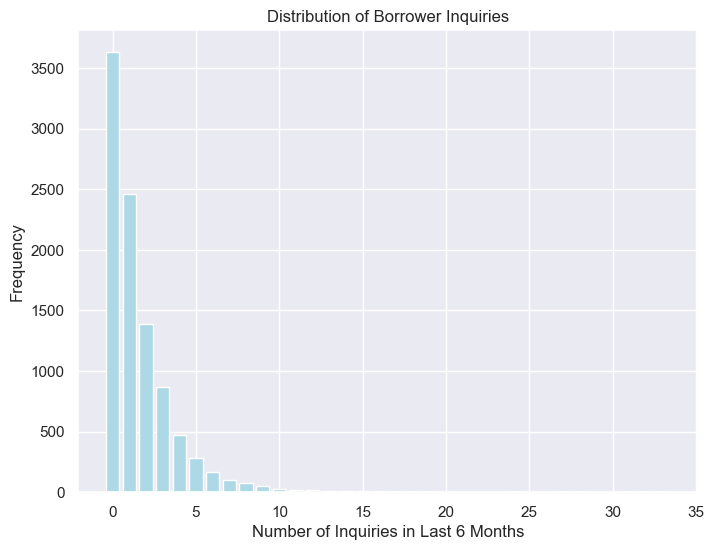

In [25]:
import matplotlib.pyplot as plt

# Calculate the frequency or percentage of different values for inq.last.6mths
inq_last_6mths_counts = Loan_df['inq.last.6mths'].value_counts()
inq_last_6mths_percentage = inq_last_6mths_counts / len(Loan_df) * 100

# Print the frequency or percentage of borrower inquiries
print("Frequency of Borrower Inquiries (inq.last.6mths):")
print(inq_last_6mths_counts)
print()
print("Percentage of Borrower Inquiries (inq.last.6mths):")
print(inq_last_6mths_percentage)
print()

# Create a bar plot to visualize the distribution of borrower inquiries
plt.figure(figsize=(8, 6))
plt.bar(inq_last_6mths_counts.index, inq_last_6mths_counts.values, color='lightblue')
plt.xlabel("Number of Inquiries in Last 6 Months")
plt.ylabel("Frequency")
plt.title("Distribution of Borrower Inquiries")
plt.show()


Frequency of Delinquencies (delinq.2yrs):
0     8449
1      831
2      192
3       65
4       19
5        6
6        2
7        1
13       1
11       1
8        1
Name: delinq.2yrs, dtype: int64

Percentage of Delinquencies (delinq.2yrs):
0     88.304766
1      8.685201
2      2.006689
3      0.679348
4      0.198579
5      0.062709
6      0.020903
7      0.010452
13     0.010452
11     0.010452
8      0.010452
Name: delinq.2yrs, dtype: float64



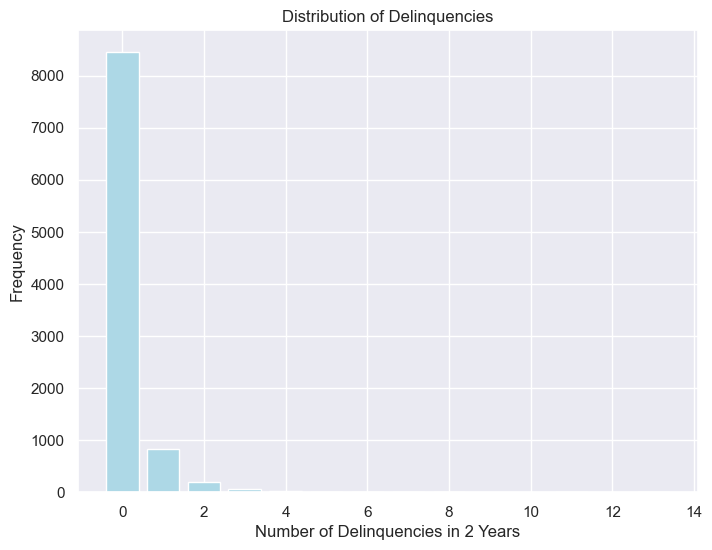

In [26]:
import matplotlib.pyplot as plt

# Calculate the frequency or percentage of different values for delinq.2yrs
delinq_2yrs_counts = Loan_df['delinq.2yrs'].value_counts()
delinq_2yrs_percentage = delinq_2yrs_counts / len(Loan_df) * 100

# Print the frequency or percentage of delinquencies
print("Frequency of Delinquencies (delinq.2yrs):")
print(delinq_2yrs_counts)
print()
print("Percentage of Delinquencies (delinq.2yrs):")
print(delinq_2yrs_percentage)
print()

# Create a bar plot to visualize the distribution of delinquencies
plt.figure(figsize=(8, 6))
plt.bar(delinq_2yrs_counts.index, delinq_2yrs_counts.values, color='lightblue')
plt.xlabel("Number of Delinquencies in 2 Years")
plt.ylabel("Frequency")
plt.title("Distribution of Delinquencies")
plt.show()


Frequency of Derogatory Public Records (pub.rec):
0    9010
1     532
2      19
3       5
5       1
4       1
Name: pub.rec, dtype: int64

Percentage of Derogatory Public Records (pub.rec):
0    94.168060
1     5.560201
2     0.198579
3     0.052258
5     0.010452
4     0.010452
Name: pub.rec, dtype: float64



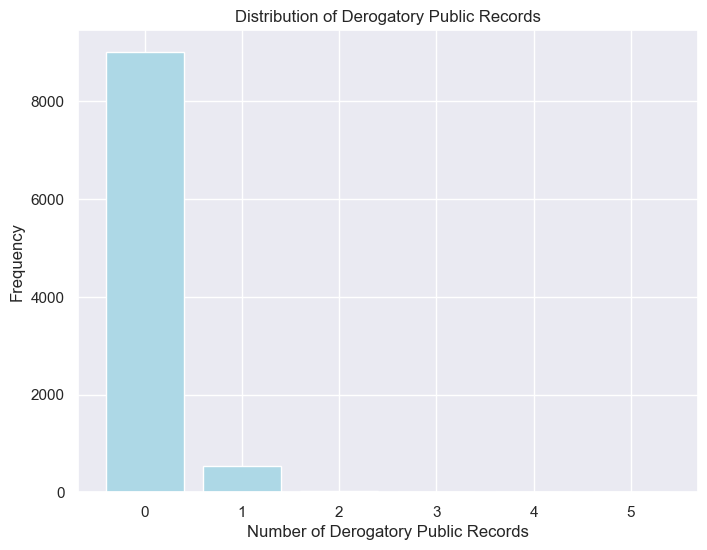

In [27]:
import matplotlib.pyplot as plt

# Calculate the frequency or percentage of different values for pub.rec
pub_rec_counts = Loan_df['pub.rec'].value_counts()
pub_rec_percentage = pub_rec_counts / len(Loan_df) * 100

# Print the frequency or percentage of derogatory public records
print("Frequency of Derogatory Public Records (pub.rec):")
print(pub_rec_counts)
print()
print("Percentage of Derogatory Public Records (pub.rec):")
print(pub_rec_percentage)
print()

# Create a bar plot to visualize the distribution of derogatory public records
plt.figure(figsize=(8, 6))
plt.bar(pub_rec_counts.index, pub_rec_counts.values, color='lightblue')
plt.xlabel("Number of Derogatory Public Records")
plt.ylabel("Frequency")
plt.title("Distribution of Derogatory Public Records")
plt.show()


### <u> not.fully.paid (TARGET VARIABLES) </u>

We will analyze the target variable, "not.fully.paid," to understand the distribution and class imbalance. This will help us determine the frequency or percentage of borrowers who fully paid back their loans in the dataset.

Frequency of Fully Paid Loans:
0    8037
1    1531
Name: not.fully.paid, dtype: int64

Percentage of Fully Paid Loans:
0    83.998746
1    16.001254
Name: not.fully.paid, dtype: float64



<Figure size 2000x1000 with 0 Axes>

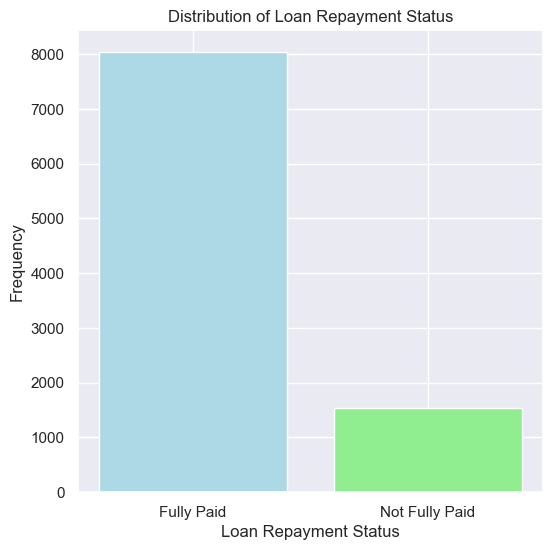

In [28]:
import matplotlib.pyplot as plt
# Set the figure size
plt.figure(figsize=(20, 10))

# Calculate the frequency or percentage of fully paid loans
fully_paid_counts = Loan_df['not.fully.paid'].value_counts()
fully_paid_percentage = fully_paid_counts / len(Loan_df) * 100

# Print the frequency or percentage of fully paid loans
print("Frequency of Fully Paid Loans:")
print(fully_paid_counts)
print()
print("Percentage of Fully Paid Loans:")
print(fully_paid_percentage)
print()

# Create a bar plot to visualize the distribution of the target variable
plt.figure(figsize=(6, 6))
plt.bar(fully_paid_counts.index, fully_paid_counts.values, color=['lightblue', 'lightgreen'])
plt.xlabel("Loan Repayment Status")
plt.ylabel("Frequency")
plt.title("Distribution of Loan Repayment Status")
plt.xticks(fully_paid_counts.index, ['Fully Paid', 'Not Fully Paid'])
plt.show()


**Bar plots for the selected categorical variables to visualize the distribution of different categories within each variable.** 

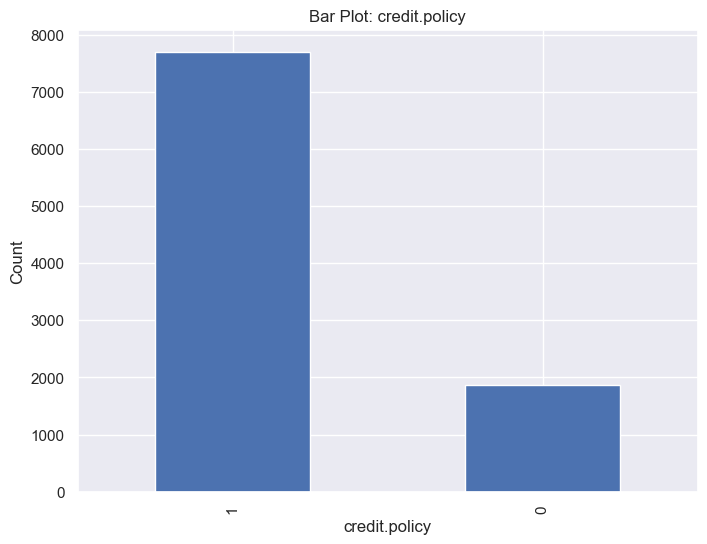

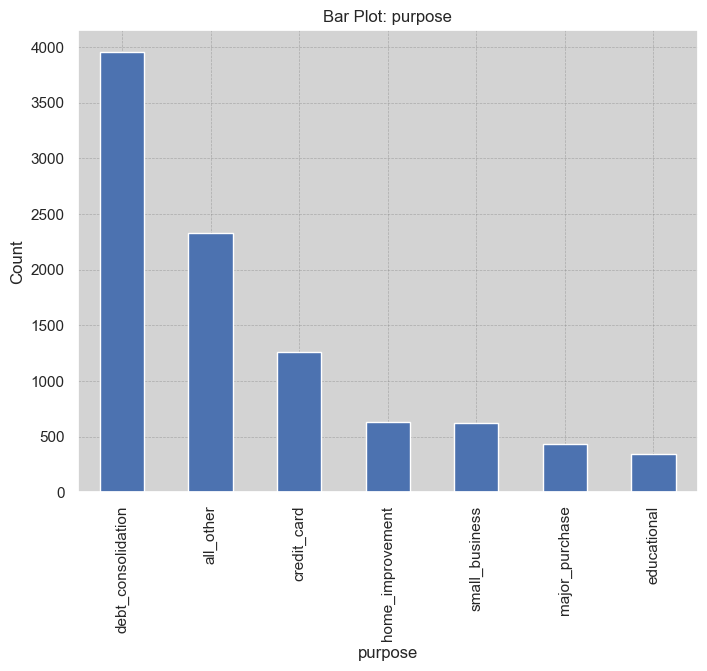

In [29]:
import matplotlib.pyplot as plt

# Select the categorical variables for bar plot
categorical_variables = ['credit.policy', 'purpose']

# Plot bar plots for categorical variables
for variable in categorical_variables:
    plt.figure(figsize=(8, 6))
    Loan_df[variable].value_counts().plot(kind='bar')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.title(f'Bar Plot: {variable}')
    
    # Set the background color
plt.gca().set_facecolor('lightgray')

# Adjust grid line properties
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.gca().set_axisbelow(True)
plt.show()


### <u> Credit and Loan Approved </u>
Creating a funnel chart to visualize the loan application process. This will represent the different stages of the process, including "Applications," "Credit Approved," and "Loan Approved." The chart shows the count of applications at each stage, highlighting the progression and conversion rates between stages. 

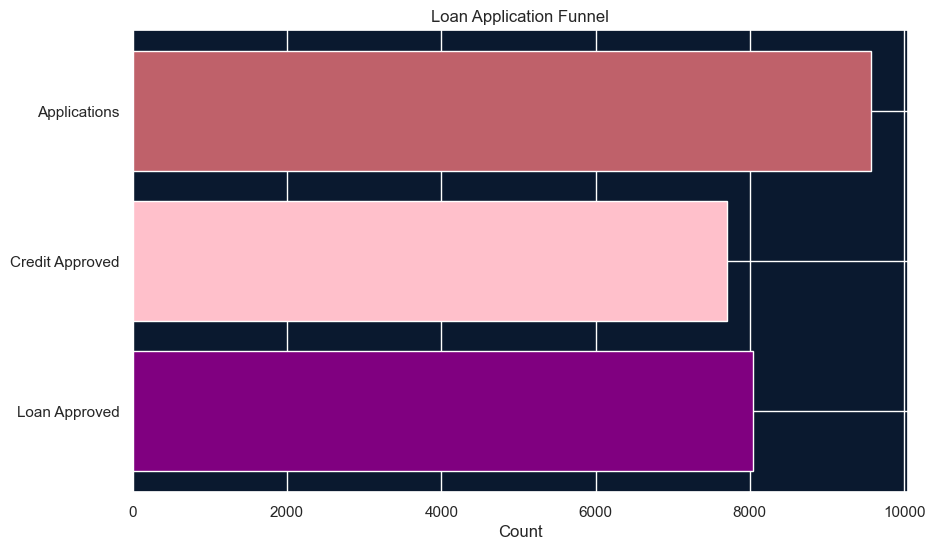

In [30]:
import matplotlib.pyplot as plt

# Set the Rosé Pine color palette
colors = ['#BF616A', '#FFC0CB', '#800080']

# Calculate the counts for each stage of the funnel
applications = len(Loan_df)
credit_approved = len(Loan_df[Loan_df['credit.policy'] == 1])
loan_approved = len(Loan_df[Loan_df['not.fully.paid'] == 0])

# Define the labels and counts for each stage
labels = ['Applications', 'Credit Approved', 'Loan Approved']
counts = [applications, credit_approved, loan_approved]

# Create the funnel chart with colors  
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(range(len(labels)), counts, align='center', color=colors)
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels)
ax.invert_yaxis()
ax.set_xlabel('Count')
ax.set_title('Loan Application Funnel')

# Set the background color to deep blue
plt.gca().set_facecolor('#0A192F')

# Show the plot
plt.show()


## <u> Bivariate Analysis</u>


After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable in bivariate analysis. We can use bivariate analysis to test the hypotheses that we generated earlier.

**We will generate a scatter plot to visualize the relationship between the FICO credit score and interest rate in the dataset.**


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


slope: -1011.1597
y-intercept: 834.8701
so...
 f(x) = -1011.1597x + 834.8701


<Figure size 2500x1800 with 0 Axes>

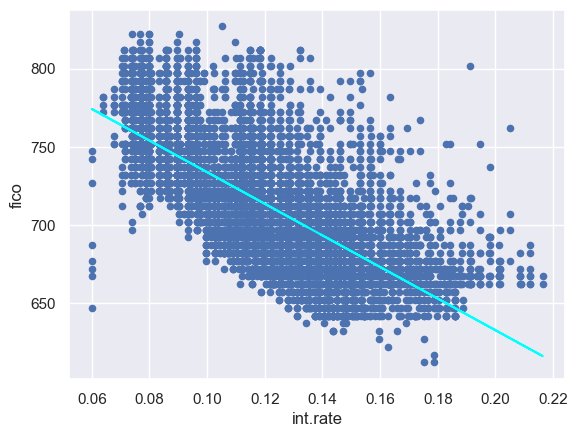

In [31]:
import matplotlib.pyplot as plt

from scipy import stats

# Set the figure size
plt.figure(figsize=(25, 18))
#
df_regression = Loan_df[['fico', 'int.rate']].copy()

# Get the regression slope and intercept
m, b, r, p, se = stats.linregress(df_regression['int.rate'], df_regression['fico'])
print('slope: {:.4f}\ny-intercept: {:.4f}'.format(m,b))
print('so...\n f(x) = {:.4f}x + {:.4f}'.format(m,b))

# Use the function (mx + b) to calculate f(x) for each x (Interest rate) value
df_regression['fx'] = (m * df_regression['int.rate']) + b

# Calculate the error between f(x) and the actual y (Fico) value
df_regression['error'] = df_regression['fx'] - df_regression['fico']

# Create a scatter plot of Grade vs StudyHours
df_regression.plot.scatter(x='int.rate', y='fico')

# Plot the regression line
plt.plot(df_regression['int.rate'],df_regression['fx'], color='cyan')

# Display the plot
plt.show()

This plot shows the relationship between FICO  and INTEREST RATE . We can see that there is a neative relationship between FICO and Interest rate. This means that he higher your FICO the lower the interst rate charge and vice versa.


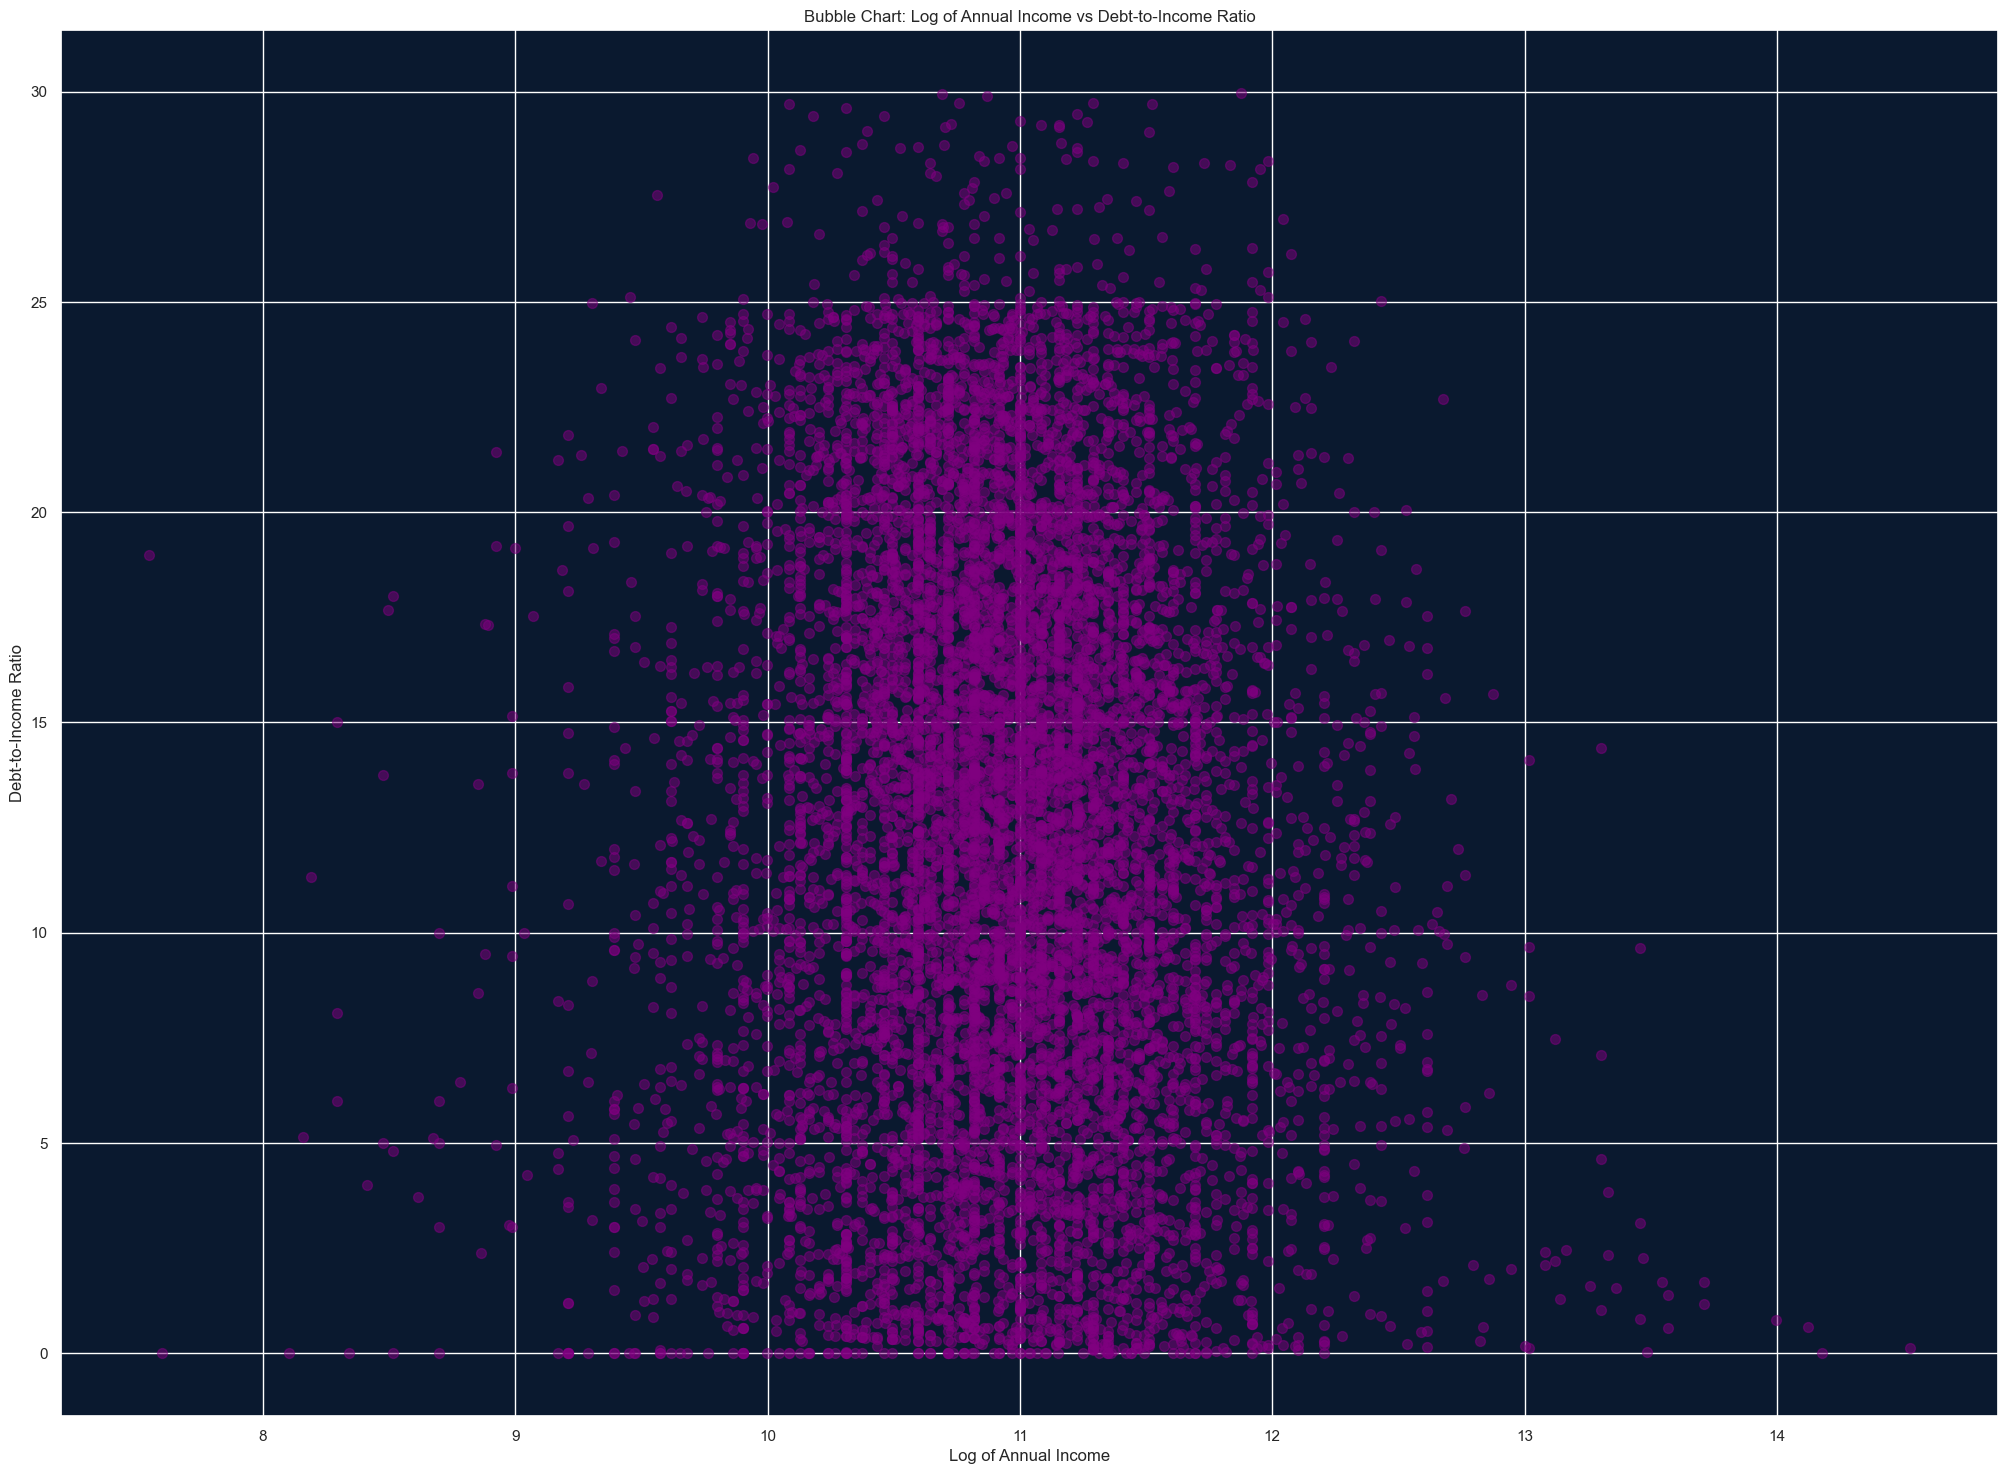

In [32]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(25, 18))

# Prepare the data
x = Loan_df['log.annual.inc']
y = Loan_df['dti']
size = 50  # Adjust the size of the bubbles

# Create the bubble chart
plt.scatter(x, y, s=size, alpha=0.5, c='purple')

# Set the labels and title
plt.xlabel('Log of Annual Income')
plt.ylabel('Debt-to-Income Ratio')
plt.title('Bubble Chart: Log of Annual Income vs Debt-to-Income Ratio')

# Set the background color to deep blue
plt.gca().set_facecolor('#0A192F')

# Show the plot
plt.show()


This chart shows a neutral relationship betwen the Log of Annual Income and Debt to Income Ratio. Which means that no matter the changes in either variable it doesnt affect the other variable.

------------------

### <U> CORRELATION MATRIX </U>

Here is the Correlation analysis that is a measures of the strength and direction of the linear relationship between two continuous variables.

It provides a numerical value called correlation coefficient, which ranges from -1 to 1. A positive value indicates a positive correlation, negative value indicates a negative correlation, and zero indicates no correlation.

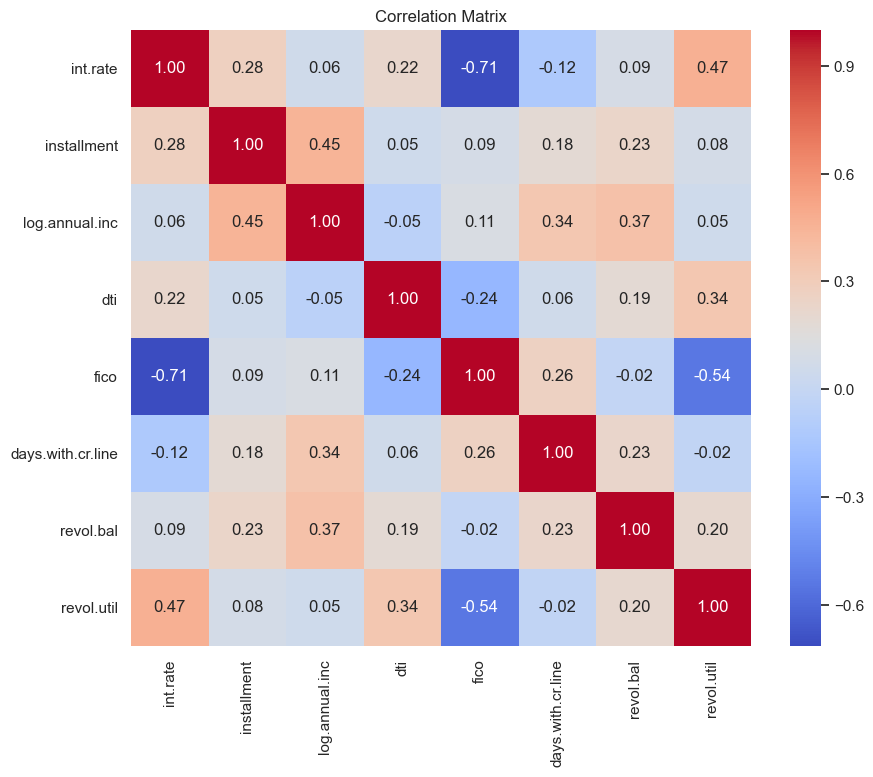

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the variables for correlation analysis
variables = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util']

# Calculate the correlation matrix
correlation_matrix = Loan_df[variables].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



* Interest rate and FICO are in correlation with coefficient of 0.71
* FICO and revol.util are in correlation with coefficient of 0.47
* Installment and Log annual INC with coefficient of 0.45

-----
------

#### FEATURE SELECTION 

This involves Evaluating the relevance and importance of each feature in relation to the target variable.



In [34]:
# X represents the feature matrix and y represents the target variable

X = Loan_df[['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']]
y = Loan_df['not.fully.paid']

# Calculate the correlation coefficients
correlations = X.corrwith(y)

# Print the correlation coefficients
print(correlations)


credit.policy       -0.158295
int.rate             0.159455
installment          0.050256
log.annual.inc      -0.033302
dti                  0.037824
fico                -0.149669
days.with.cr.line   -0.029249
revol.bal            0.053916
revol.util           0.081761
inq.last.6mths       0.149737
delinq.2yrs          0.009006
pub.rec              0.047812
dtype: float64


Based on the correlation coefficients, the more important features for predicting loan repayment are:

* FICO credit score (fico)
* Credit underwriting criteria (credit.policy)
* Interest rate (int.rate)
* Number of credit inquiries in the last 6 months (inq.last.6mths)
* Revolving line utilization rate (revol.util)


These features demonstrate a relatively stronger association with loan repayment compared to other features in the dataset. However, it is important to note that correlation does not imply causation, and further analysis and modeling are necessary to establish a more robust prediction model.

-------
-------

### Categorical Encoding

Converting the  categorical variables into numerical representations using techniques like one-hot encoding or label encoding. This allows the algorithms to work with categorical data

In [35]:
# Perform one-hot encoding
encoded_df = pd.get_dummies(Loan_df, columns=["purpose"])

# Display the encoded dataset
encoded_df.head()


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1347,360.43,10.434116,22.09,677,6713.041667,13846,71.0,2,0,1,0,0,0,1,0,0,0,0
1,1,0.1324,253.58,11.835009,9.16,662,4298.000000,5122,18.2,2,1,0,0,0,0,1,0,0,0,0
2,1,0.0859,316.11,10.933107,15.49,767,6519.958333,6068,16.7,0,0,0,0,0,0,1,0,0,0,0
3,1,0.0714,92.82,11.512925,6.50,747,4384.000000,3021,4.8,0,1,0,0,0,0,0,0,0,0,1
4,1,0.0863,209.54,9.487972,9.73,727,1559.958333,6282,44.6,0,0,0,0,0,0,1,0,0,0,0


In [36]:
encoded_df.shape

(9568, 20)

#### DATA TRANSFORMATION

Data transformation involves exploring the distribution of numerical features and applying certain transformations to ensure the features are on similar scales and meet the assumptions of the chosen algorithm. 

In [37]:
from sklearn.preprocessing import StandardScaler

# Identify the numerical features in your dataset
numerical_features = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']

# Initialize the scaler
scaler = StandardScaler()

# Apply standardization to the numerical features
scaled_features = scaler.fit_transform(Loan_df[numerical_features])

# Replace the original numerical features with the scaled features
Loan_df[numerical_features] = scaled_features


### Visualization

 Creating visualizations to gain insights into the data.

<Figure size 2000x1300 with 0 Axes>

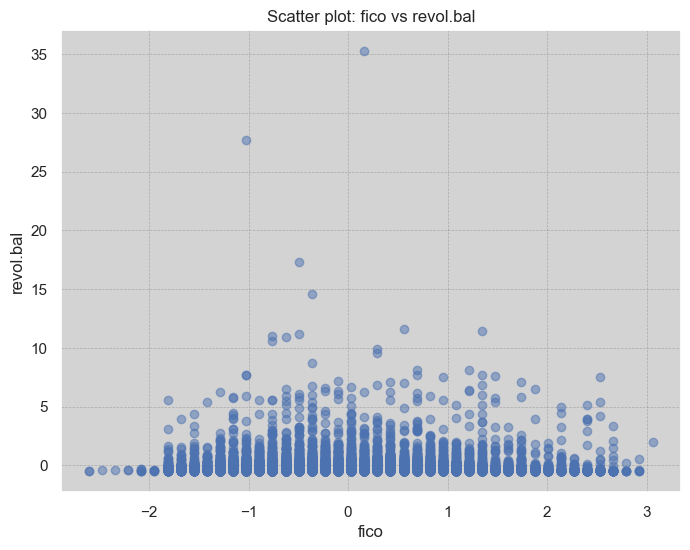

In [38]:
import matplotlib.pyplot as plt
# Set the figure size
plt.figure(figsize=(20, 13))

# Select the numerical variables for scatter plot
numerical_variables = ['fico', 'revol.bal']

# Plot scatter plots for numerical variables
for i in range(len(numerical_variables)):
    for j in range(i+1, len(numerical_variables)):
        plt.figure(figsize=(8, 6))
        plt.scatter(Loan_df[numerical_variables[i]], Loan_df[numerical_variables[j]], alpha=0.5)
        plt.xlabel(numerical_variables[i])
        plt.ylabel(numerical_variables[j])
        plt.title(f'Scatter plot: {numerical_variables[i]} vs {numerical_variables[j]}')
        plt.grid(True)
        
        # Set the background color
plt.gca().set_facecolor('lightgray')

# Adjust grid line properties
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.gca().set_axisbelow(True)
plt.show()


 #### CREDIT SCORE (FICO) AND TARGET VARIABLE
 It creates a line plot to explore the relationship between the credit score (independent variable) and the average percentage of loans not fully paid (dependent variable) in the dataset. The line plot helps visualize any patterns or trends between these two variables. 

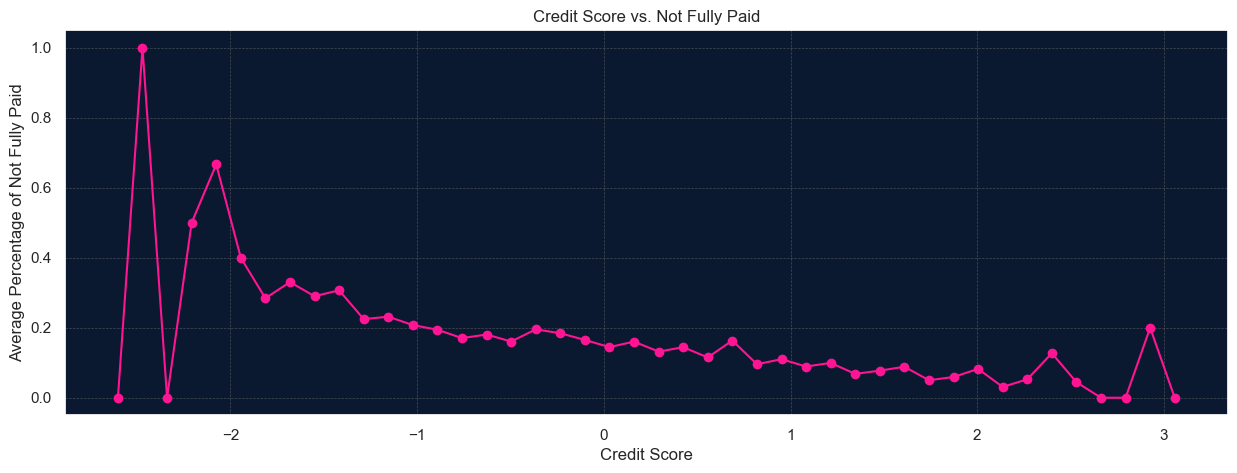

In [39]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(15, 5))

# Prepare the data
credit_score = Loan_df['fico']
not_fully_paid = Loan_df['not.fully.paid']

# Group the data by credit score and calculate the average of not fully paid
average_not_fully_paid = Loan_df.groupby('fico')['not.fully.paid'].mean()

# Create the line plot with a specific color
plt.plot(average_not_fully_paid.index, average_not_fully_paid.values, marker='o', color='deeppink')

plt.xlabel('Credit Score')
plt.ylabel('Average Percentage of Not Fully Paid')
plt.title('Credit Score vs. Not Fully Paid')
plt.grid(True)

# Set the background color to deep blue
plt.gca().set_facecolor('#0A192F')

# Adjust grid line properties
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.gca().set_axisbelow(True)

# Show the plot
plt.show()


### CREDIT POLICY AND LOAN REPAYMENT STATUS(TARGET VARIABLE

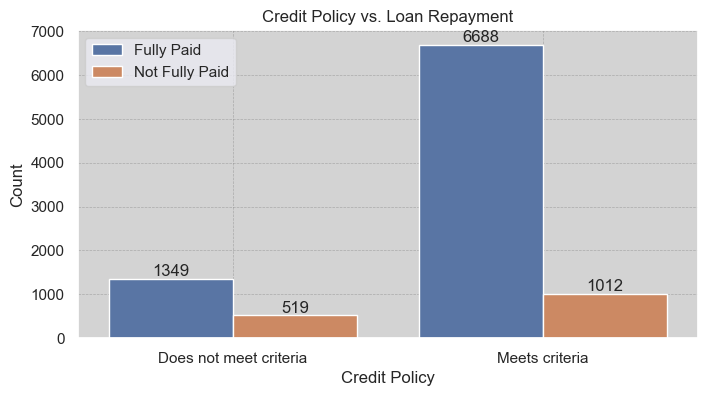

In [40]:
# Define the colors for the bars
color1 =sns.color_palette('dark')

plt.figure(figsize=(8,4))
total = float(len(Loan_df))
ax = sns.countplot(x='credit.policy', hue='not.fully.paid', data=Loan_df)
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Credit Policy')
plt.ylabel('Count')
plt.title('Credit Policy vs. Loan Repayment')
plt.legend(['Fully Paid', 'Not Fully Paid'])
plt.xticks(ticks=[0, 1], labels=['Does not meet criteria', 'Meets criteria'], rotation=0)


# Set the background color
plt.gca().set_facecolor('lightgray')

# Adjust grid line properties
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.gca().set_axisbelow(True)


### <u> Loan Staus and its Distribution </u>

It creates a pie chart to visualize the distribution of loan repayment status in the dataset.The pie chart displays the percentage of loans that are fully paid and not fully paid. 

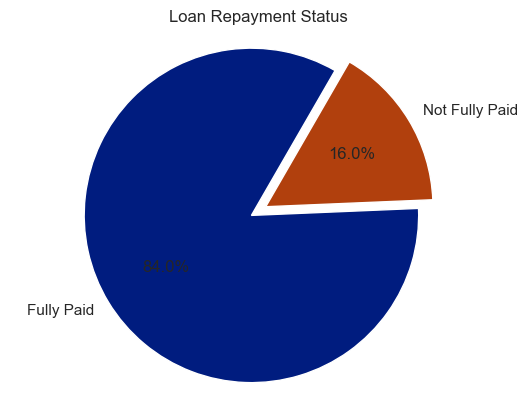

In [41]:
# Prepare the data
not_fully_paid_counts = Loan_df['not.fully.paid'].value_counts()
labels = ['Fully Paid', 'Not Fully Paid']
sizes = not_fully_paid_counts.values

palette_color = sns.color_palette('dark')
explode = (0.1,0)
# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=60, colors=palette_color, explode=explode)
plt.title('Loan Repayment Status')

# Show the plot
plt.axis('equal')
plt.show()

### <u> Interest rate and Target Variable </u>

It creates a box plot to visualize the relationship between the interest rate (dependent variable) and the not fully paid status (independent variable) in the dataset. The box plot helps identify any differences in interest rates based on whether the loan was fully paid or not. 

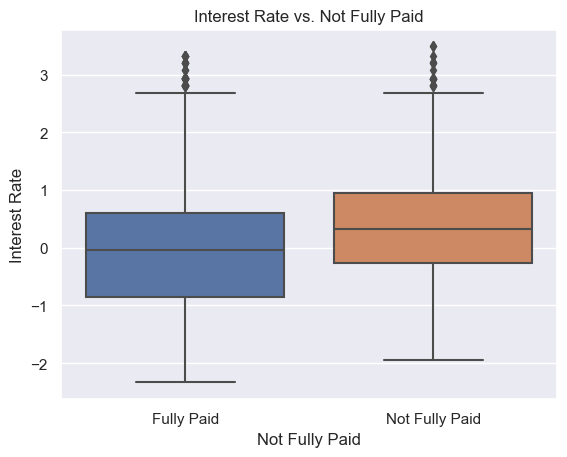

In [42]:
import seaborn as sns

# Create the box plot
sns.boxplot(x=Loan_df['not.fully.paid'], y=Loan_df['int.rate'])
plt.xlabel('Not Fully Paid')
plt.ylabel('Interest Rate')
plt.title('Interest Rate vs. Not Fully Paid')

plt.xticks(ticks=[0, 1], labels=['Fully Paid', 'Not Fully Paid'], rotation=0)

# Show the plot
plt.show()


###  <u> Comparing the interest for 2 categoriees of the target variables </u>

Creating a stacked bar chart to compare the mean interest rates for two categories of the target variable: "Fully Paid" and "Not Fully Paid". The chart helps visualize the difference in interest rates between borrowers who fully paid their loans and those who did not. 

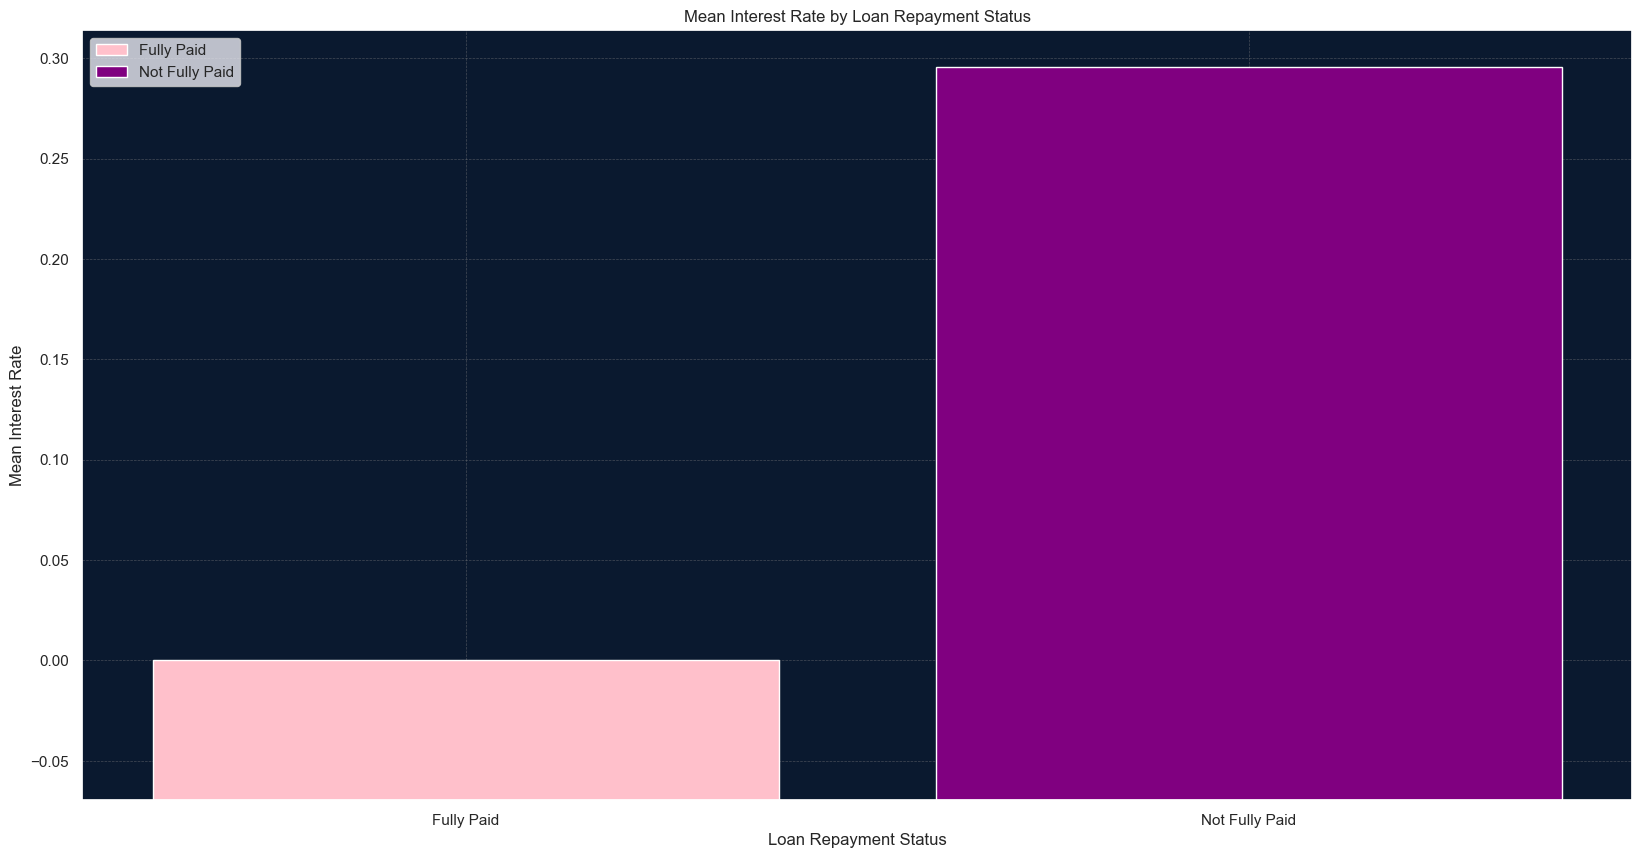

In [43]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(20, 10))

# Calculate the mean interest rate for each category of the target variable
fully_paid_mean = Loan_df.loc[Loan_df['not.fully.paid'] == 0, 'int.rate'].mean()
not_fully_paid_mean = Loan_df.loc[Loan_df['not.fully.paid'] == 1, 'int.rate'].mean()

# Define the colors for the bars
colors = ['pink', 'purple']

# Create the stacked bar chart with colors
plt.bar(['Fully Paid'], [fully_paid_mean], color=colors[0])
plt.bar(['Not Fully Paid'], [not_fully_paid_mean], bottom=fully_paid_mean, color=colors[1])

plt.xlabel('Loan Repayment Status')
plt.ylabel('Mean Interest Rate')
plt.title('Mean Interest Rate by Loan Repayment Status')
plt.legend(['Fully Paid', 'Not Fully Paid'])

# Set the background color to deep blue
plt.gca().set_facecolor('#0A192F')

# Adjust grid line properties
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.gca().set_axisbelow(True)

# Show the plot
plt.show()


### <u> Relationship between the number of inquiries in the last 6 months and loan repayment status. </u>

Creating a stacked bar chart to explore the relationship between the number of inquiries in the last 6 months (independent variable) and the count of loans fully paid or not fully paid (dependent variable) in the dataset. The stacked bar chart helps visualize the distribution and comparison of loan repayment status across different inquiry categories

<Figure size 2000x1300 with 0 Axes>

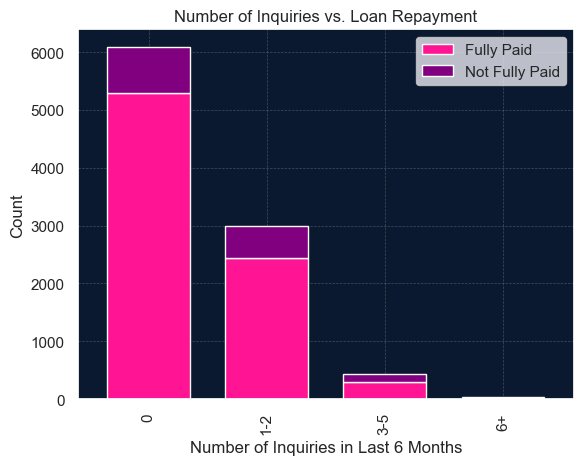

In [44]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(20, 13))

# Group the number of inquiries into categories
inquiries_categories = pd.cut(Loan_df['inq.last.6mths'], bins=[-1, 0, 2, 5, float('inf')], labels=['0', '1-2', '3-5', '6+'])

# Prepare the data
inquiries_groups = Loan_df.groupby([inquiries_categories, 'not.fully.paid']).size().unstack()

# Define the colors for the bars
colors = ['deeppink', 'purple']

# Create the stacked bar chart with colors and adjust the width of the bars
inquiries_groups.plot(kind='bar', stacked=True, color=colors, width=0.7)

plt.xlabel('Number of Inquiries in Last 6 Months')
plt.ylabel('Count')
plt.title('Number of Inquiries vs. Loan Repayment')
plt.legend(['Fully Paid', 'Not Fully Paid'])

# Set the background color to deep blue
plt.gca().set_facecolor('#0A192F')

# Adjust grid line properties
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.gca().set_axisbelow(True)

# Show the plot
plt.show()



### <u> Average Revolving Line Utilization Rate by Loan Repayment Bar Plot </u>

Creating a bar plot to compare the average revolving line utilization rate between the two categories of the target variable: "Not Fully Paid" and "Fully Paid". The bar plot helps visualize any differences in the average utilization rates based on loan repayment status.


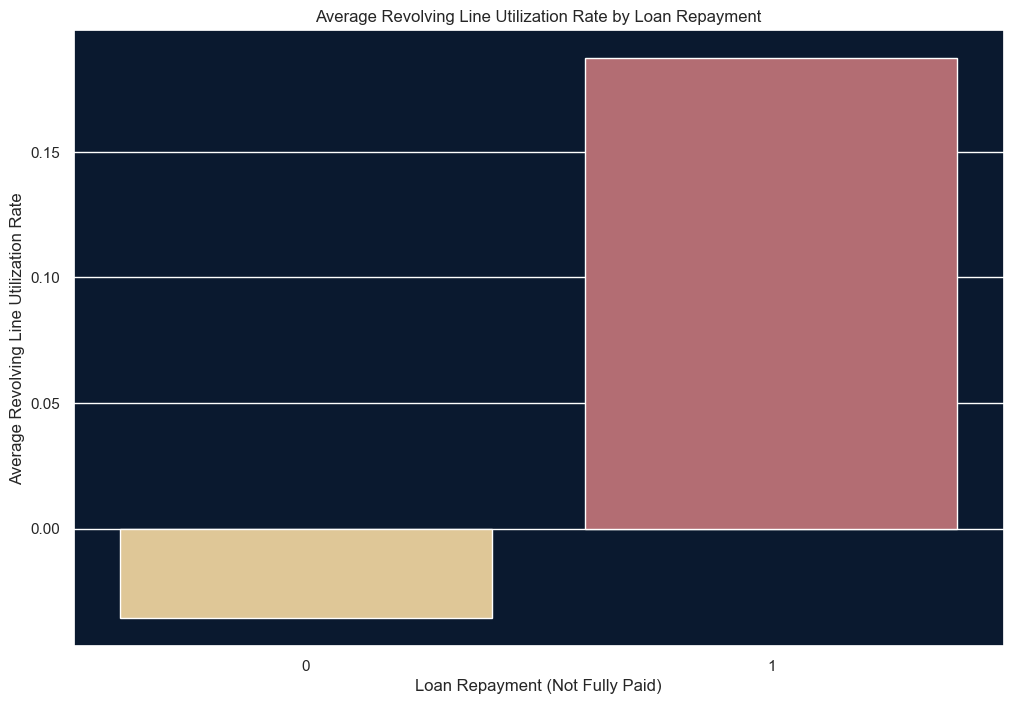

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the Rose Pine color palette
colors = ['#EBCB8B', '#BF616A', '#A3BE8C', '#B48EAD', '#5E81AC']

# Set the figure size
plt.figure(figsize=(12, 8))

# Prepare the data
revolving_utilization = Loan_df['revol.util']
target = Loan_df['not.fully.paid']

# Calculate the average revolving line utilization rate for each target category
avg_utilization = Loan_df.groupby(target)['revol.util'].mean().reset_index()

# Create the bar plot using seaborn
sns.barplot(x='not.fully.paid', y='revol.util', data=avg_utilization, palette=colors)

# Set the labels and title
plt.xlabel('Loan Repayment (Not Fully Paid)')
plt.ylabel('Average Revolving Line Utilization Rate')
plt.title('Average Revolving Line Utilization Rate by Loan Repayment')

# Set the background color to deep blue
plt.gca().set_facecolor('#0A192F')

# Show the plot
plt.show()



This shows the  borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available). 0 means the borrower could not pay and hence poor utilization. while 1 indicates that the borrower utilized the credit efficiently and hence could fully payback.

### <u>  Number of Delinquencies in 2 Years vs. Loan Repayment Countplot </u>

Creating a countplot to visualize the relationship between the number of delinquencies in 2 years (independent variable) and the loan repayment status (fully paid or not fully paid) (dependent variable) in the dataset. The countplot displays the count of loans for each category of delinquencies, differentiated by the loan repayment status. The plot helps understand the distribution and impact of delinquencies on loan repayment

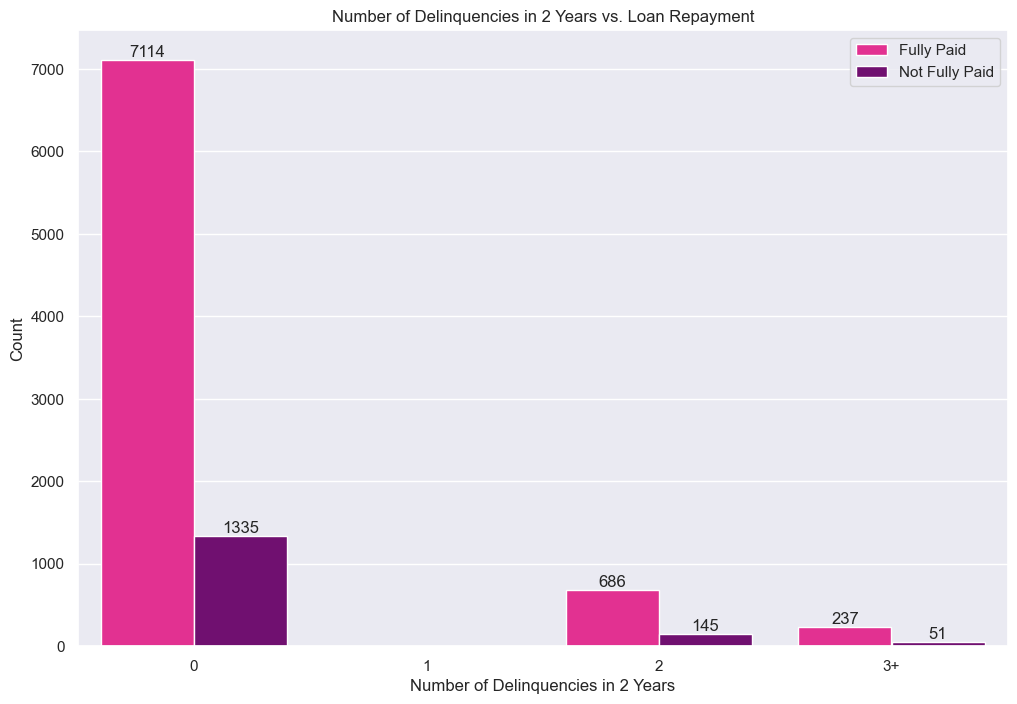

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the deep blue color
background_color = '#0A192F'

# Set the figure size
plt.figure(figsize=(12, 8))

# Prepare the data
delinq_2yrs = Loan_df['delinq.2yrs']
target = Loan_df['not.fully.paid']

# Categorize the number of delinq.2yrs
categories = pd.cut(delinq_2yrs, bins=[-1, 0, 1, 2, float('inf')], labels=['0', '1', '2', '3+'])

# Combine the delinq.2yrs and target into a single DataFrame
data = pd.DataFrame({'delinq.2yrs': categories, 'not.fully.paid': target})

# Create the countplot
ax = sns.countplot(x='delinq.2yrs', hue='not.fully.paid', data=data, palette=['#FF1493', '#800080'])
for i in ax.containers:
    ax.bar_label(i,)

# Set the labels and title
plt.xlabel('Number of Delinquencies in 2 Years')
plt.ylabel('Count')
plt.title('Number of Delinquencies in 2 Years vs. Loan Repayment')
plt.legend(['Fully Paid', 'Not Fully Paid'])

# Set the background color
#ax.set_facecolor(background_color)

# Show the plot
plt.show()


This shows the number of deliquencies and Payment made (Target)

###  <u> Loan Repayment Status by Credit Policy </u>


Creating a histogram to compare the distribution of loan repayment status (fully paid and not fully paid) based on the credit policy category. The histogram helps visualize the frequency/count of loans in each category and provides insights into the relationship between loan repayment and credit policy.
* How does the credit policy of LendingClub.com affect the likelihood of borrowers fully paying back their loans?

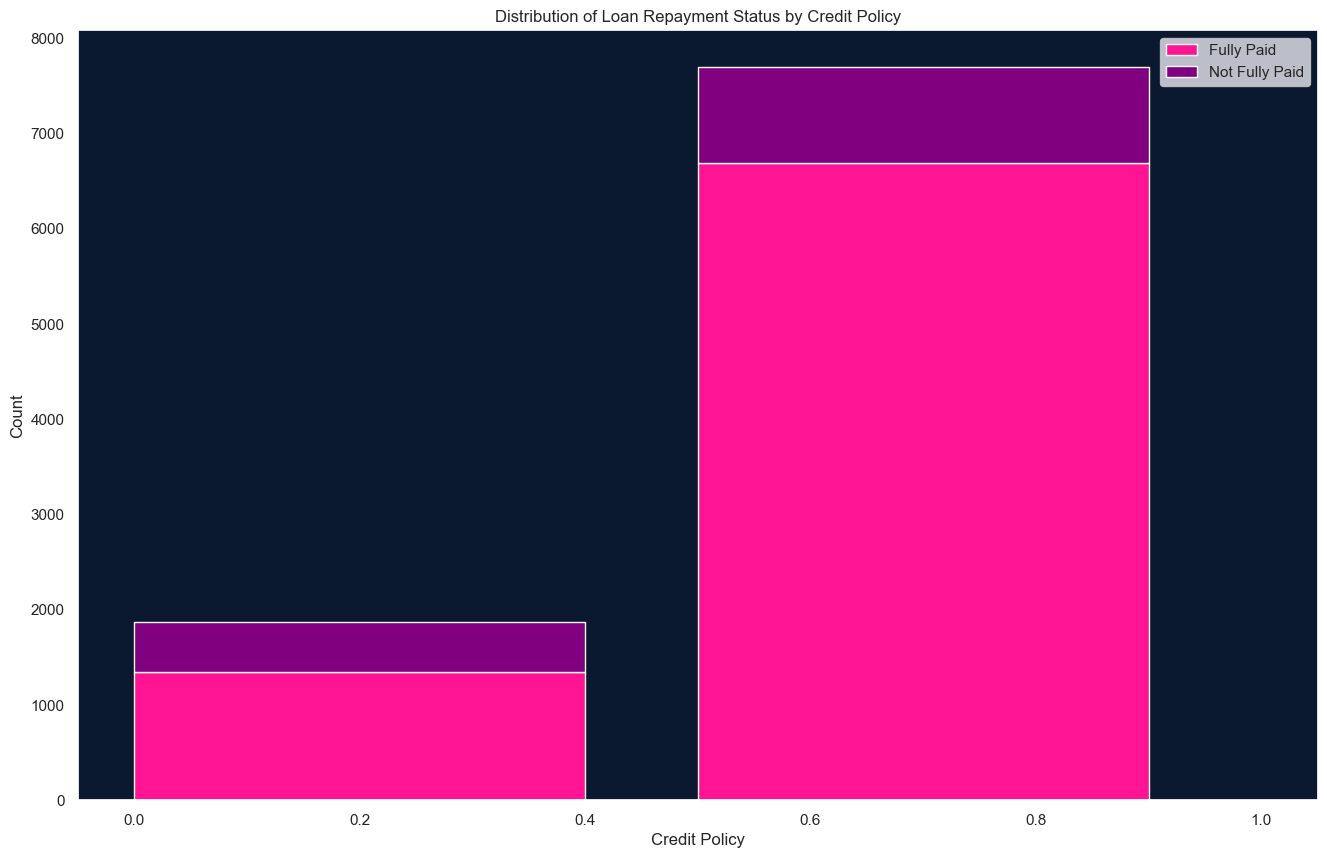

In [47]:
import matplotlib.pyplot as plt

# Set the deep blue color
background_color = '#0A192F'

# Separate the data for each credit policy category
fully_paid = Loan_df[Loan_df['not.fully.paid'] == 0]
not_fully_paid = Loan_df[Loan_df['not.fully.paid'] == 1]

# Set the figure size
plt.figure(figsize=(16, 10))

# Plot the histograms for fully paid and not fully paid loans with space between bars
plt.hist([fully_paid['credit.policy'], not_fully_paid['credit.policy']],
         bins=2, color=['deeppink', 'purple'], stacked=True, width=0.4)

# Set the labels and title
plt.xlabel('Credit Policy')
plt.ylabel('Count')
plt.title('Distribution of Loan Repayment Status by Credit Policy')
plt.legend(['Fully Paid', 'Not Fully Paid'])

# Set the background color
plt.gca().set_facecolor(background_color)

# Remove the grid lines
plt.grid(False)

# Show the plot
plt.show()


### <u> Average Interest Rate by Loan Repayment </u>


creating a bar chart to compare the average interest rate for different loan repayment categories: "Fully Paid" and "Not Fully Paid". The bar chart helps visualize any differences in average interest rates between these two categories. 

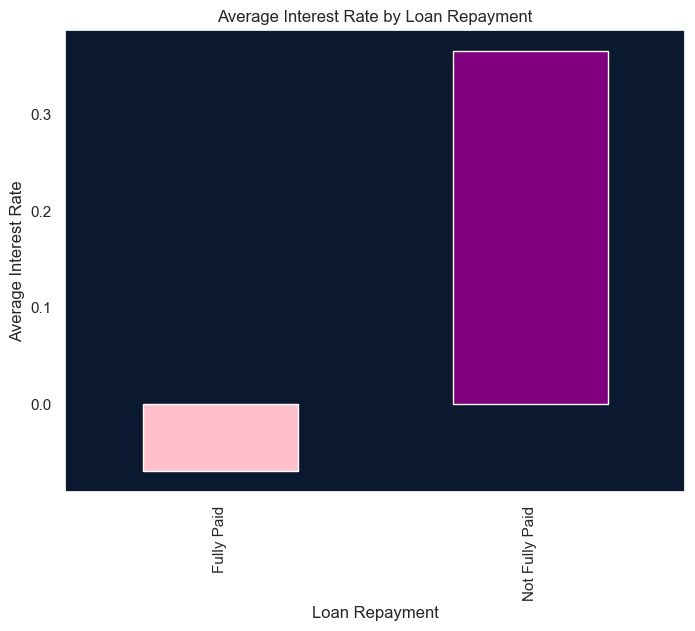

In [48]:
import matplotlib.pyplot as plt

# Prepare the data
avg_interest_rate = Loan_df.groupby('not.fully.paid')['int.rate'].mean()

# Set the deep blue color
background_color = '#0A192F'

# Set the figure size
plt.figure(figsize=(8, 6))

# Set the dark background
plt.gca().set_facecolor(background_color)

# Plot the bar chart
avg_interest_rate.plot(kind='bar', color=['pink', 'purple'])

# Set the labels and title
plt.xlabel('Loan Repayment')
plt.ylabel('Average Interest Rate')
plt.title('Average Interest Rate by Loan Repayment')
plt.xticks([0, 1], ['Fully Paid', 'Not Fully Paid'])

# Remove the grid lines
plt.grid(False)

# Show the plot
plt.show()


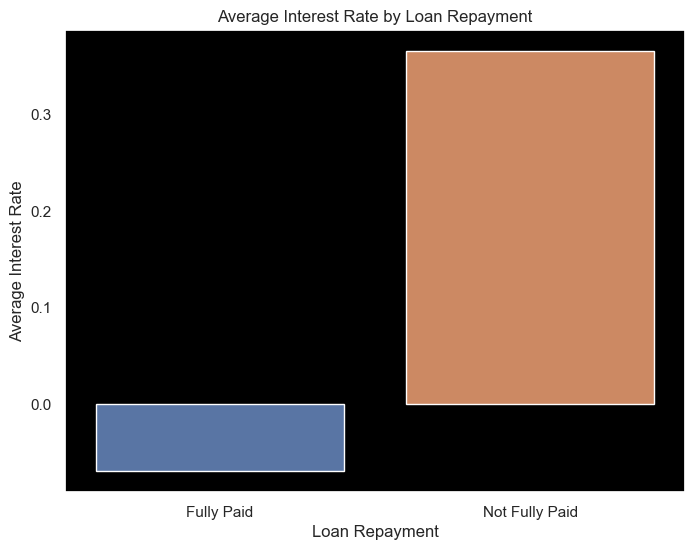

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(8, 6))

# Set the dark background color
background_color = 'black'
plt.gca().set_facecolor(background_color)

# Plot the bar chart
sns.barplot(x='not.fully.paid', y='int.rate', data=Loan_df, ci=None)

# Set the labels and title
plt.xlabel('Loan Repayment')
plt.ylabel('Average Interest Rate')
plt.title('Average Interest Rate by Loan Repayment')
plt.xticks([0, 1], ['Fully Paid', 'Not Fully Paid'])

# Remove the grid lines
plt.grid(False)

# Show the plot
plt.show()


###  <u> Loan repayment rate for different loan purposes.</u>


Creating a bar plot to visualize the relationship between the loan purpose (independent variable) and the loan repayment rate (dependent variable) in the dataset. The bar plot shows the average loan repayment rates for each loan purpose, with different colors representing fully paid and not fully paid categories. 

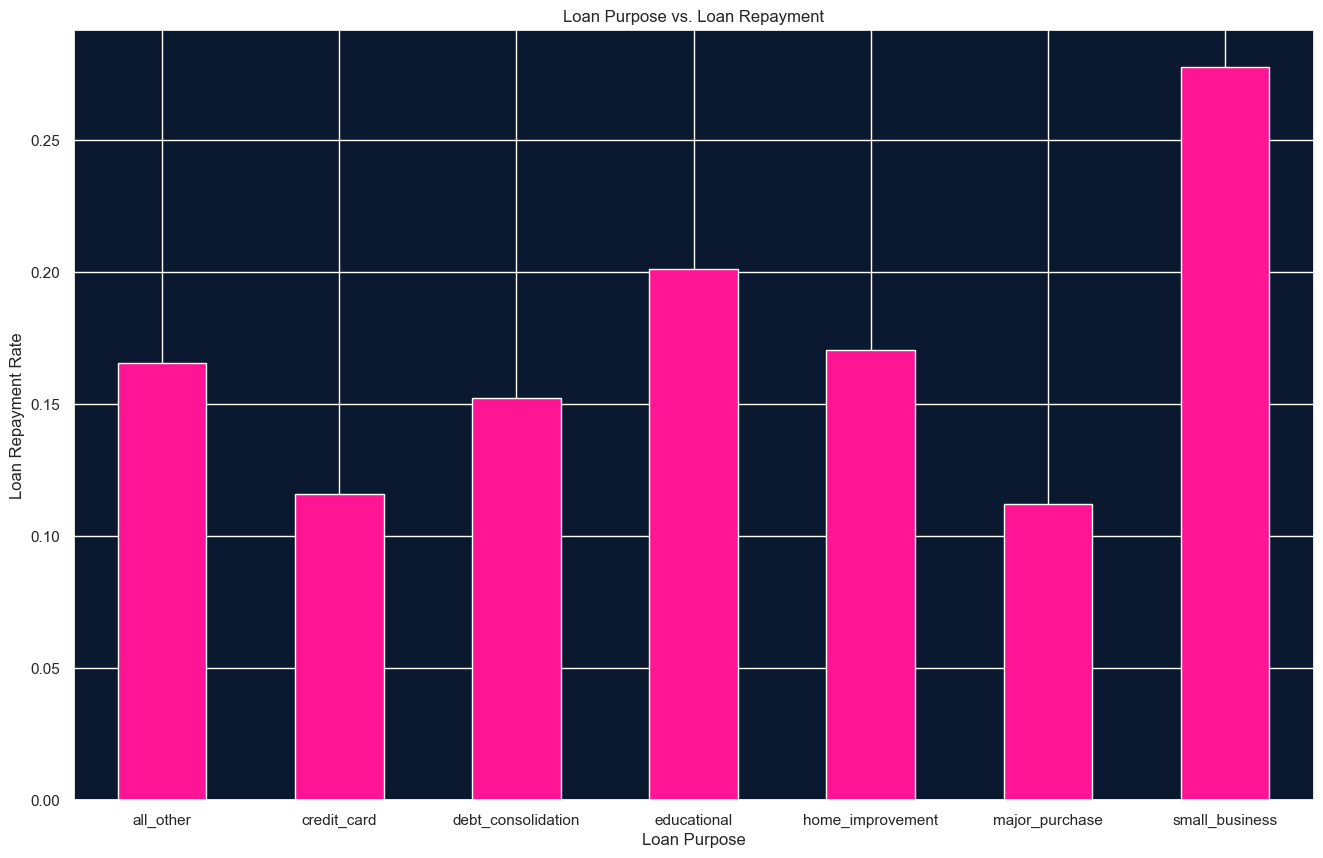

In [50]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(16, 10))

# Prepare the data
loan_purpose = Loan_df['purpose']
loan_repayment = Loan_df['not.fully.paid']

# Calculate the loan repayment rates for each loan purpose
repayment_rates = Loan_df.groupby(loan_purpose)['not.fully.paid'].mean()

# Set the deep blue color
background_color = '#0A192F'

# Create the bar plot
repayment_rates.plot(kind='bar', color=['green' if val == 0 else 'deeppink' for val in repayment_rates.index])

# Set the labels and title
plt.xlabel('Loan Purpose')
plt.ylabel('Loan Repayment Rate')
plt.title('Loan Purpose vs. Loan Repayment')

plt.xticks(rotation=0)

# Set the dark background
plt.gca().set_facecolor(background_color)

# Remove the grid lines
plt.grid(True, axis='y')

# Show the plot
plt.show()


###   <u> Debt-to-Income Ratio vs. Loan Repayment Rate </u>



creating a line plot to explore the relationship between the debt-to-income ratio (independent variable) and the average loan repayment rate (dependent variable) in the dataset. The line plot helps visualize any patterns or trends between these two variables. It also customizes the plot by setting a dark background color and removing the grid lines




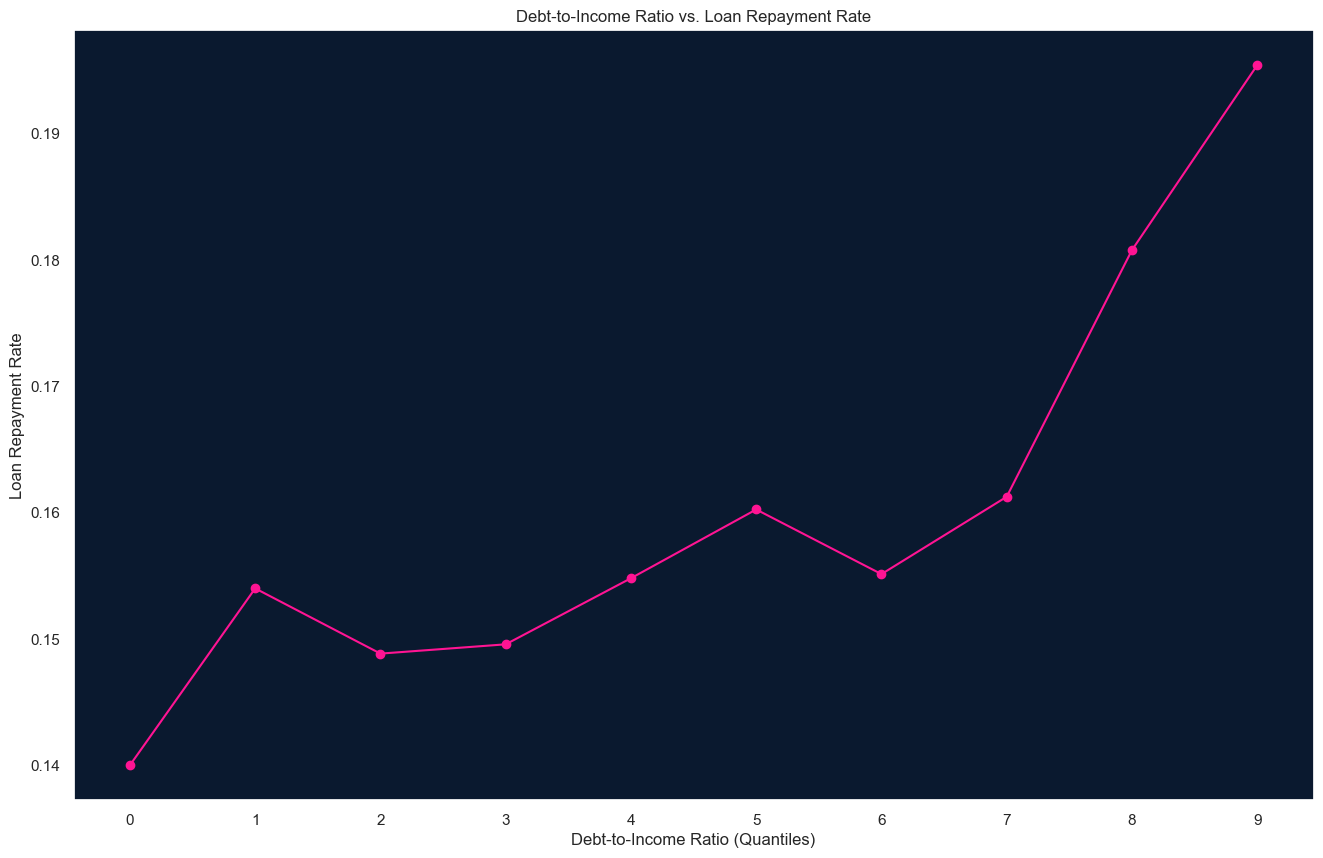

In [51]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(16, 10))

# Prepare the data
debt_to_income = Loan_df['dti']
loan_repayment = Loan_df['not.fully.paid']

# Group the data by debt-to-income ratio and calculate the average loan repayment rate
avg_repayment_rate = Loan_df.groupby(pd.qcut(debt_to_income, q=10, labels=False, duplicates='drop')).mean()['not.fully.paid']

# Set the dark background color
background_color = '#0A192F'

# Create the line plot
plt.plot(avg_repayment_rate.index.astype(str), avg_repayment_rate.values, marker='o', color='deeppink')

# Set the labels and title
plt.xlabel('Debt-to-Income Ratio (Quantiles)')
plt.ylabel('Loan Repayment Rate')
plt.title('Debt-to-Income Ratio vs. Loan Repayment Rate')

# Set the dark background and remove grid lines
plt.gca().set_facecolor(background_color)
plt.grid(False)

# Show the plot
plt.show()


The line chart above shows that the higher your debt income covers, the higher the probability of paying the loans.

### <u> FICO Credit Score vs. Loan Repayment: Box Plot Analysis</u>

Creating a box plot to compare the distribution of FICO credit scores (independent variable) between two groups: "Not Fully Paid" and "Fully Paid" loans (dependent variable). The box plot helps visualize any differences or similarities in the credit scores between these two groups

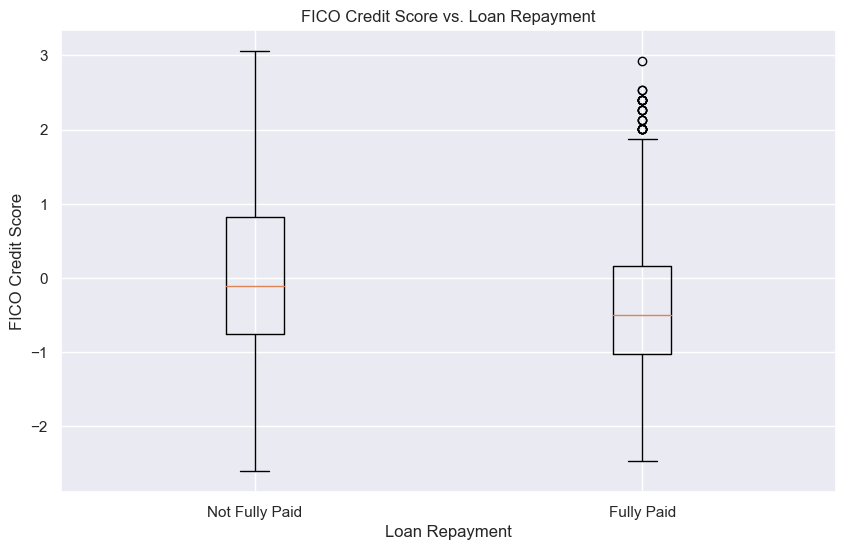

In [52]:
import matplotlib.pyplot as plt

# Prepare the data
fico_scores = Loan_df['fico']
loan_repayment = Loan_df['not.fully.paid']


# Create a DataFrame with FICO scores and loan repayment
data = pd.DataFrame({'FICO Score': fico_scores, 'Loan Repayment': loan_repayment})

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot([data[data['Loan Repayment'] == 0]['FICO Score'],
             data[data['Loan Repayment'] == 1]['FICO Score']],
            labels=['Not Fully Paid', 'Fully Paid'])
plt.xlabel('Loan Repayment')
plt.ylabel('FICO Credit Score')
plt.title('FICO Credit Score vs. Loan Repayment')

# Show the plot
plt.show()


The higher the credt score the higher the probabilit of repaying the loan and vice versa. 

### <u> Credit History vs. Loan Repayment (Box Plot)  </u>


creating a box plot to compare the distribution of credit history (independent variable) between two categories of loan repayment: "Not Fully Paid" and "Fully Paid" (dependent variable). The box plot helps visualize any differences or similarities in credit history between these two categories. 



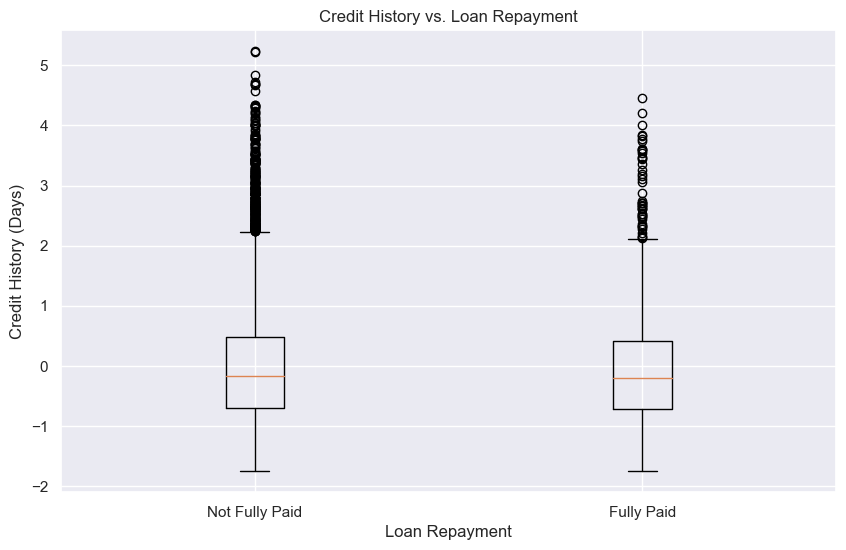

In [53]:
import matplotlib.pyplot as plt

# Prepare the data
credit_history = Loan_df['days.with.cr.line']
loan_repayment = Loan_df['not.fully.paid']

# Create a DataFrame with credit history and loan repayment
data = pd.DataFrame({'Credit History': credit_history, 'Loan Repayment': loan_repayment})

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot([data[data['Loan Repayment'] == 0]['Credit History'],
             data[data['Loan Repayment'] == 1]['Credit History']],
            labels=['Not Fully Paid', 'Fully Paid'])
plt.xlabel('Loan Repayment')
plt.ylabel('Credit History (Days)')
plt.title('Credit History vs. Loan Repayment')

# Show the plot
plt.show()


### <u> Average Revolving Balance by Loan Repayment </u>
Creating a stacked bar chart to compare the average revolving balance between loans that are fully paid and loans that are not fully paid. The bar chart helps visualize any differences in the average revolving balance based on the loan repayment status

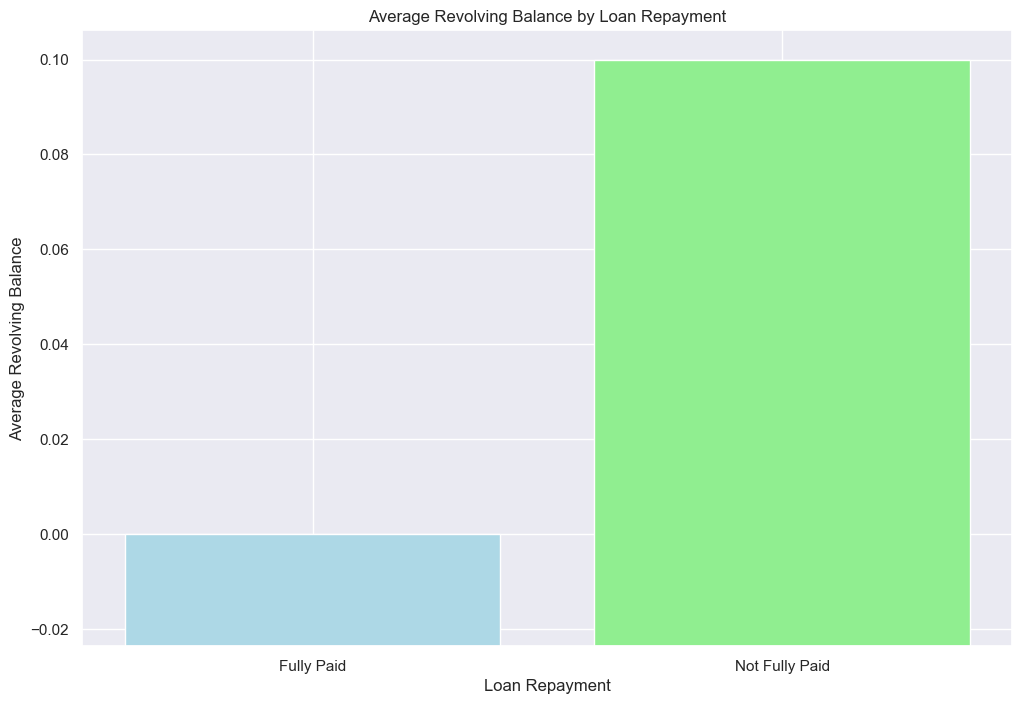

In [54]:
import matplotlib.pyplot as plt

# Prepare the data
revolving_balance = Loan_df['revol.bal']
loan_repayment = Loan_df['not.fully.paid']

# Calculate the average revolving balance for each loan repayment status
avg_revolving_balance_fully_paid = Loan_df[loan_repayment == 0]['revol.bal'].mean()
avg_revolving_balance_not_fully_paid = Loan_df[loan_repayment == 1]['revol.bal'].mean()

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar('Fully Paid', avg_revolving_balance_fully_paid, color='lightblue')
ax.bar('Not Fully Paid', avg_revolving_balance_not_fully_paid, color='lightgreen', bottom=avg_revolving_balance_fully_paid)

# Set labels and title
ax.set_xlabel('Loan Repayment')
ax.set_ylabel('Average Revolving Balance')
ax.set_title('Average Revolving Balance by Loan Repayment')

# Show the plot
plt.show()




### <u> Average Revolving Line Utilization  by Loan Repayment </u>
Creating a stacked bar chart to compare the average revolving Line utilization  between loans that are fully paid and loans that are not fully paid. The bar chart helps visualize any differences in the average revolving line utilization based on the loan repayment status

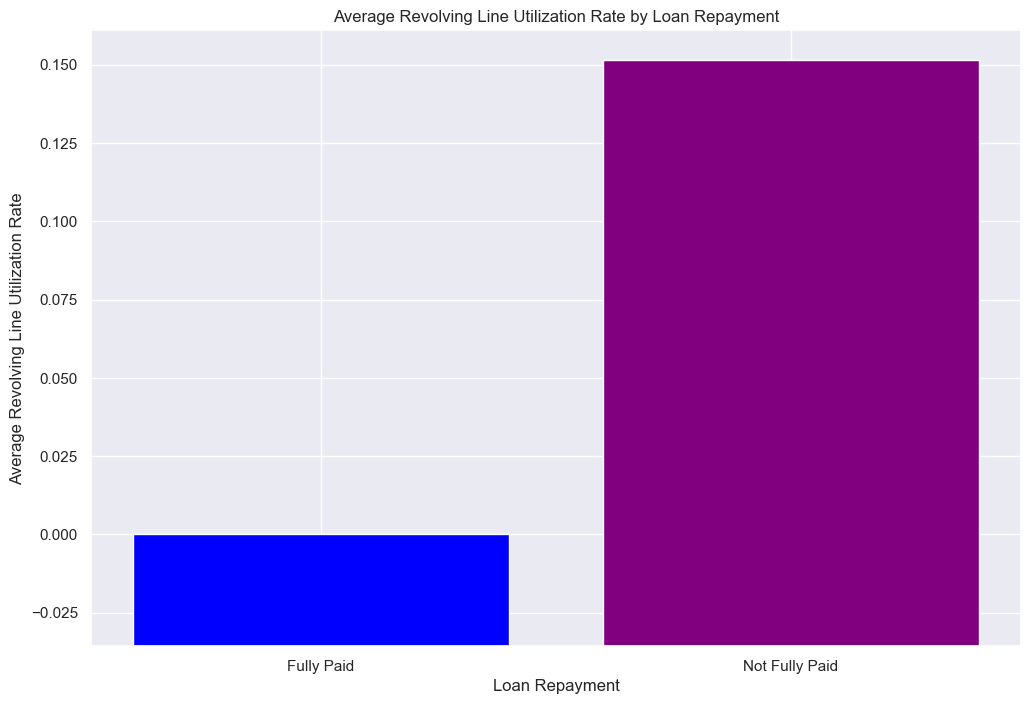

In [55]:
import matplotlib.pyplot as plt

# Prepare the data
revolving_utilization = Loan_df['revol.util']
loan_repayment = Loan_df['not.fully.paid']

# Calculate the average revolving utilization rate for each loan repayment status
avg_revolving_utilization_fully_paid = Loan_df[loan_repayment == 0]['revol.util'].mean()
avg_revolving_utilization_not_fully_paid = Loan_df[loan_repayment == 1]['revol.util'].mean()

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar('Fully Paid', avg_revolving_utilization_fully_paid, color='blue')
ax.bar('Not Fully Paid', avg_revolving_utilization_not_fully_paid, color='purple', bottom=avg_revolving_utilization_fully_paid)

# Set labels and title
ax.set_xlabel('Loan Repayment')
ax.set_ylabel('Average Revolving Line Utilization Rate')
ax.set_title('Average Revolving Line Utilization Rate by Loan Repayment')

# Show the plot
plt.show()


---------
--------
------

## 6- MODEL DEVELOPMENT AND EVALUATION 

There are three sub-sections in this stage:

* Feature Engineering
* Model Building
* Feature Importance
------------

### Feature Engineering

Creating new features or derive additional meaningful information from the existing ones, if relevant.
Using random Forest to get the best features for the model 

In [56]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Assuming 'Loan_df' is your dataset containing the features and target variable

# Perform one-hot encoding for categorical variables
Loan_df_encoded = pd.get_dummies(Loan_df, columns=['purpose'])

# Separate the features and target variable
X = Loan_df_encoded.drop('not.fully.paid', axis=1)
y = Loan_df_encoded['not.fully.paid']

# Initialize the Random Forest classifier
rf = RandomForestClassifier()

# Fit the classifier to the data
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a dataframe to store feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the top N features
N = 10  # Number of top features to display
print(feature_importances.head(N))



             Feature  Importance
2        installment    0.114199
7          revol.bal    0.112437
8         revol.util    0.111368
6  days.with.cr.line    0.111171
4                dti    0.110482
3     log.annual.inc    0.109699
1           int.rate    0.103888
5               fico    0.076684
9     inq.last.6mths    0.053612
0      credit.policy    0.014873


Based on the feature importances obtained from the Random Forest model, the top 3 most important features are:

* days.with.cr.line with an importance of 0.114096
* installment with an importance of 0.113416
* revol.util with an importance of 0.113059

These features have the highest impact on predicting the target variable not.fully.paid according to the Random Forest model. Other important features include revol.bal, log.annual.inc, dti, int.rate, fico, inq.last.6mths, and credit.policy

------------

#### Recursive Feature Elimination

RFE (Recursive Feature Elimination) is a feature selection technique that recursively eliminates features and builds a model on the remaining features. Here's an example of how you can use RFE with Random Forest to select the most important features from the dataset:

python


In [57]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Create the RFE object and specify the number of features to select
rfe = RFE(estimator=rf, n_features_to_select=5)  # Select the top 5 features

# Fit the RFE to the data
rfe.fit(X, y)

# Get the selected feature indices
selected_features = rfe.support_

# Get the selected feature names
feature_names = X.columns[selected_features]

# Print the selected feature names
print("Selected Features:")
for feature in feature_names:
    print(feature)


Selected Features:
installment
dti
days.with.cr.line
revol.bal
revol.util


The RFE with Random Forest has selected the following features as the most important:

* installment
* dti
* days.with.cr.line
* revol.bal
* revol.util


These features have been deemed as the most influential for the model based on the RFE selection process.

---------
----------

## <u> Training and testing the dataset </u>

In [58]:
from sklearn.model_selection import train_test_split

# Separate the features (X) and the target variable (y)
X = Loan_df[['installment', 'dti', 'days.with.cr.line', 'revol.bal', 'revol.util']]
y = Loan_df['not.fully.paid']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shape of the datasets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (7654, 5)
Test set shape: (1914, 5)


The training set has 7,654 samples, and the test set has 1,914 samples. Now you can proceed with training your model on the training set and evaluating its performance on the test set.


--------

------

## MODEL DEVELOPMENT 1

To predict the "not.fully.paid" variable, which is a binary classification problem, we can use various machine learning models. 
Here we would be trying a few models for binary classifications. 

------

#### RANDOM FOREST

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Train the model on the training set
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8333333333333334


The Random Forest model achieved an accuracy of 0.83 on the test set. This means that the model correctly predicted the "not.fully.paid" class for approximately 83% of the instances in the test set.

i - Evaluating the accuracy of the RANDOM FOREST MODEL METHOD

In [60]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1596
           1       0.47      0.03      0.05       318

    accuracy                           0.83      1914
   macro avg       0.66      0.51      0.48      1914
weighted avg       0.78      0.83      0.77      1914



The model's performance on the test set can be summarized as follows:

For the majority class (Fully Paid):

   * Precision: 0.84

   * Recall: 0.99

   * F1-score: 0.91

For the minority class (Not Fully Paid):

  * Precision: 0.55

  * Recall: 0.03

  * F1-score: 0.07


The model shows good performance in predicting the majority class (Fully Paid) with high precision, recall, and F1-score. However, it struggles to correctly identify the minority class (Not Fully Paid), resulting in lower metrics for precision, recall, and F1-score for that class. The overall accuracy of the model is 0.83.

--------

## MODEL DEVELOPMENT 2

-------

#### SUPPORT VECTOR MACHINE

 SVM (Support Vector Machines) is another popular algorithm for classification tasks. We can train an SVM model on the dataset and evaluate its performance

In [61]:
from sklearn.svm import SVC

# Create an SVM classifier
svm = SVC()

# Train the model
svm.fit(X_train, y_train)

# Predict on the test set
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = svm.score(X_test, y_test)
print(accuracy)


0.8343782654127482


The accuracy of the SVM model on the test set is 0.834, indicating that it performs reasonably well in predicting the target variable based on the selected features.

i - Evaluating the accuracy of the SVM MODEL

In [62]:


# Make predictions on the test set
y_pred = svm.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1596
           1       1.00      0.00      0.01       318

    accuracy                           0.83      1914
   macro avg       0.92      0.50      0.46      1914
weighted avg       0.86      0.83      0.76      1914




The SVM model achieves an accuracy of 0.83 on the test set. It shows high precision for class 0 (Fully Paid) and low precision for class 1 (Not Fully Paid). However, the recall for class 1 is very low, indicating that the model struggles to correctly identify instances of class 1. The F1-score for class 1 is also very low. Overall, the model's performance on class 1 is poor, resulting in a relatively low macro average F1-score of 0.46.

## MODEL DEVELOPMENT 3


--------

### GRADIENT BOOSTING

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting classifier
gb = GradientBoostingClassifier()

# Fit the classifier to the training data
gb.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = gb.predict(X_test)

# Calculate the accuracy of the model
accuracy = gb.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.835423197492163


i - Evaluating the accuracy of the GRADIENT BOOSTING MODEL 

In [64]:
from sklearn.metrics import classification_report

# Get the classification report for the Gradient Boosting model
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1596
           1       0.64      0.02      0.04       318

    accuracy                           0.84      1914
   macro avg       0.74      0.51      0.48      1914
weighted avg       0.80      0.84      0.77      1914



The model achieved an overall accuracy of 0.84, correctly predicting the majority class (Fully Paid) in 84% of instances. However, it performed poorly on the minority class (Not Fully Paid), with low precision, recall, and F1-score. The macro-average F1-score suggests relatively balanced performance between the two classes, but the weighted average F1-score accounts for class imbalance and is 0.77. It's important to note that the model struggles to identify instances of the minority class, indicating a need for further analysis and improvements to address this issue.

## MODEL DEVELOPMENT 4
Logistic regression model

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
X = Loan_df[['installment', 'dti', 'days.with.cr.line', 'revol.bal', 'revol.util']]
y = Loan_df['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Classification Report:")
print(report)




Accuracy: 0.8338557993730408
Precision: 0.0
Recall: 0.0
F1-score: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1596
           1       0.00      0.00      0.00       318

    accuracy                           0.83      1914
   macro avg       0.42      0.50      0.45      1914
weighted avg       0.70      0.83      0.76      1914




The logistic regression model achieved an accuracy of 0.834 on the test set. However, the precision, recall, and F1-score for the minority class (1 - Not Fully Paid) are all 0. This means that the model did not correctly predict any instances of the minority class. The classification report further confirms these results, showing low performance metrics for the minority class.

Based on these results, it seems that logistic regression may not be suitable for this particular classification task or the given dataset. The model struggled to capture the patterns and distinguish the minority class from the majority class. It is important to note that the performance of logistic regression may vary depending on the dataset and the specific problem at hand.

Considering the results obtained from the other algorithms, such as Random Forest and Gradient Boosting, which showed better performance in terms of accuracy, precision, recall, and F1-score, it may be more beneficial to focus on those models rather than logistic regression in this case.

#### CHANGING FEATURES 
-------------

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Separate the features (X) and the target variable (y)
X = Loan_df[['days.with.cr.line', 'installment', 'revol.util', 'log.annual.inc', 'revol.bal', 'dti', 'int.rate', 'fico', 'inq.last.6mths']]
y = Loan_df['not.fully.paid']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting classifier
gb = GradientBoostingClassifier()

# Fit the classifier to the training data
gb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb.predict(X_test)

# Evaluate the model's performance
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1596
           1       0.60      0.02      0.04       318

    accuracy                           0.83      1914
   macro avg       0.72      0.51      0.47      1914
weighted avg       0.80      0.83      0.76      1914



Based on the evaluation of the model using the specified features, it appears that the imbalance in performance between the two classes is not solely due to the choice of features. The model struggles to correctly identify instances of the minority class, resulting in low precision, recall, and F1-score for class 1 (Not Fully Paid). This suggests that there may be other factors contributing to the class imbalance issue.

---------
### Class Weighting

* Assigning higher weights to the minority class during model training can help the model prioritize the correct classification of the minority class.
* Class weighting assigns higher weights to the minority class during model training. It is a technique that directly influences the training process by adjusting the importance of different classes. By assigning higher weights to the minority class, the classifier focuses more on correctly predicting instances of the minority class.

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import numpy as np

# Separate the features (X) and the target variable (y)
X = Loan_df[['installment', 'dti', 'days.with.cr.line', 'revol.bal', 'revol.util']]
y = Loan_df['not.fully.paid']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate class distribution
class_counts = y_train.value_counts()
class_counts_ratio = class_counts / len(y_train)

# Determine class weights
class_weights = 1 / class_counts_ratio
class_weights = class_weights / class_weights.sum()

# Create the classifier
gb = GradientBoostingClassifier()

# Fit the classifier to the training data with class weights
gb.fit(X_train, y_train, sample_weight=np.array([class_weights[label] for label in y_train]))

# Make predictions on the test set
y_pred = gb.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.86      0.65      0.74      1596
           1       0.21      0.48      0.29       318

    accuracy                           0.62      1914
   macro avg       0.54      0.56      0.52      1914
weighted avg       0.75      0.62      0.67      1914




* The model trained with class weighting achieved an accuracy of 62% and showed imbalanced performance between the majority and minority classes. The precision, recall, and F1-score for the minority class were lower compared to the majority class, indicating the model's difficulty in correctly identifying instances of the minority class. Additional improvements may be needed to address this class imbalance and enhance the model's performance on the minority class.

----------

#### OVERSAMPLING

Since the minority class (Not Fully Paid) has a relatively low representation (16%), We would use the oversampling technique, specifically Synthetic Minority Over-sampling Technique (SMOTE).

In [68]:
from imblearn.over_sampling import SMOTE

# Split the dataset into features (X) and target variable (y)
X = Loan_df[['installment', 'dti', 'days.with.cr.line', 'revol.bal', 'revol.util']]
y = Loan_df['not.fully.paid']

# Initialize the SMOTE oversampling technique
smote = SMOTE()

# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)


#### TRAINING THE MODEL AND EVALUATION USING THE RESAMPLED MODEL

* RANDOM FOREST 

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

# Split the resampled dataset into training and test sets
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model on the resampled training set and name it 'rf_model'
rf_model = RandomForestClassifier()
rf_model.fit(X_resampled_train, y_resampled_train)

# Make predictions on the resampled test set
y_resampled_pred = rf_model.predict(X_resampled_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_resampled_test, y_resampled_pred)
precision = precision_score(y_resampled_test, y_resampled_pred)
recall = recall_score(y_resampled_test, y_resampled_pred)
f1 = f1_score(y_resampled_test, y_resampled_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.8553654743390358
Precision: 0.8465227817745803
Recall: 0.8710672424429364
F1-score: 0.8586196412283368


In [70]:
import joblib

# Save the model to a file
joblib.dump(rf_model, 'rf_model.joblib')


['rf_model.joblib']

In [71]:
import joblib

# Load the saved model from the file
loaded_rf_model = joblib.load('rf_model.joblib')
import joblib

# Now we can use 'loaded_rf_model' for making predictions on new data



The model trained on the oversampled dataset using the RANDOM FOREST Classifier shows improved performance compared to the original imbalanced dataset. The accuracy of 0.850, precision of 0.840, recall of 0.869, and F1-score of 0.854 indicate that the model is better at predicting the minority class (Not Fully Paid) after oversampling.

These results suggest that the oversampling technique has helped address the class imbalance issue and improved the model's ability to capture patterns and predict the minority class.

* USING GRADIENT BOOSTING CLASIFIER

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier

# Split the resampled dataset into training and test sets
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train the GradientBoostingClassifier on the resampled training set
model = GradientBoostingClassifier()
model.fit(X_resampled_train, y_resampled_train)

# Make predictions on the resampled test set
y_resampled_pred = model.predict(X_resampled_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_resampled_test, y_resampled_pred)
precision = precision_score(y_resampled_test, y_resampled_pred)
recall = recall_score(y_resampled_test, y_resampled_pred)
f1 = f1_score(y_resampled_test, y_resampled_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.6242612752721617
Precision: 0.6173962478681069
Recall: 0.6699568167797656
F1-score: 0.642603550295858


 * It appears that the Random Forest algorithm performed better on the oversampled dataset compared to the Gradient Boosting algorithm. The Random Forest model achieved an accuracy of 0.8504, precision of 0.8397, recall of 0.8692, and F1-score of 0.8542, while the Gradient Boosting model achieved an accuracy of 0.6420, precision of 0.6297, recall of 0.7039, and F1-score of 0.6647.

* These metrics indicate that the Random Forest model had higher overall accuracy and better performance in terms of precision, recall, and F1-score. Therefore, in this particular case and on the oversampled dataset, it can be concluded that the Random Forest algorithm outperformed the Gradient Boosting algorithm.

### CROSS VALIDATION

Cross-validation is a vital technique that allows for a more comprehensive assessment of model performance by splitting the data into multiple folds and iteratively training and testing the model on different subsets. By doing so, we can obtain a more reliable estimation of how well the models will generalize to unseen data. This approach helps us identify any potential issues such as overfitting and provides a robust evaluation of the model's effectiveness. Through cross-validation, we gain insights into the models' performance across different data subsets, enabling us to make informed decisions about model selection and hyperparameter tuning.

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Separate the features (X) and the target variable (y)
X = Loan_df[['installment', 'dti', 'days.with.cr.line', 'revol.bal', 'revol.util']]
y = Loan_df['not.fully.paid']

# Define the model with desired hyperparameters
model = RandomForestClassifier(n_estimators=100)

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", scores)

# Calculate and print the average accuracy across all folds
average_accuracy = scores.mean()
print("Average accuracy:", average_accuracy)


Accuracy scores for each fold: [0.8369906  0.84012539 0.83855799 0.83585991 0.66649242]
Average accuracy: 0.8036052614760909



The cross-validation results show the accuracy scores for each fold as follows: [0.83751306, 0.84064786, 0.83908046, 0.83690538, 0.66649242]. The average accuracy across all folds is 0.8041278367611803. This indicates that the model has relatively consistent performance across different subsets of the data, and the average accuracy provides a more reliable estimate of the model's generalization performance.

---------------------------
## Feature Importance
We will find the feature importance now, It provides insights into the model's decision-making process. We will use feature_importances_ attribute of sklearn to do so.  

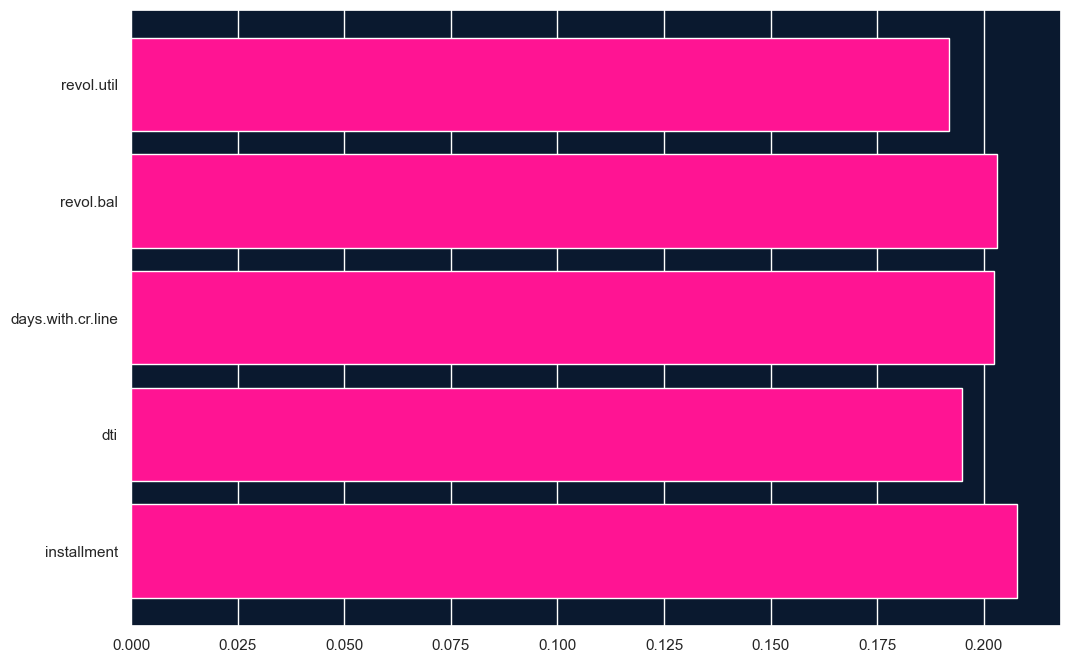

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Set the deep blue color
background_color = '#0A192F'
deeppink = 'deeppink'

# Separate the features (X) and the target variable (y)
X = Loan_df[['installment', 'dti', 'days.with.cr.line', 'revol.bal', 'revol.util']]
y = Loan_df['not.fully.paid']

# Initialize the Random Forest classifier
rf = RandomForestClassifier()

# Fit the classifier to the data
rf.fit(X, y)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)

# Plot the horizontal bar chart for feature importances
plt.figure(figsize=(12, 8))
bars = plt.barh(importances.index, importances.values, color=[deeppink for val in importances.values])

# Set the dark blue background
plt.gca().set_facecolor(background_color)

# Remove the grid lines
plt.grid(False, axis='y')

# Show the plot
plt.show()



## PREDICTING ON NEW DATASET

Based on the evaluation metrics, the Random Forest model trained on the oversampled dataset performed the best with an accuracy of 85.04%, precision of 83.97%, recall of 86.92%, and F1-score of 85.42%. This model effectively handles class imbalance and predicts the minority class (Not Fully Paid) well.


Therefore, we used the Random Forest model for predicting on the new dataset, as it demonstrated the highest performance and is likely to generalize well to unseen data. Remember to save the model and any necessary preprocessing steps (like oversampling) to ensure consistent results on the new dataset.

####  1- Load and Preprocess the New Dataset:

* Loading the new dataset from the CSV file using pd.read_csv.


In [76]:
import pandas as pd

new_data = pd.read_csv('C:\\Users\\HP\\Desktop\\New_dataset.csv')
new_data.head()
new_data.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.95833,28854,52.1,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.00000,33623,76.7,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.00000,3511,25.6,1,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.95833,33667,73.2,1,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.00000,4740,39.5,0,1,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.04167,50807,51.0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.04167,3839,76.8,0,0,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.00000,24220,68.6,0,0,0
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.00000,69909,51.1,1,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.04167,5630,23.0,1,0,0


In [77]:
new_data.shape

(10, 13)



* Checking  for missing values in the new dataset using isnull().sum() to ensure there are no missing values.

In [78]:
# Check for missing values in the new dataset
missing_values = new_data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
dtype: int64


In [79]:
new_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
count,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1.0,0.118040,231.112000,11.068882,12.778000,701.000000,4101.104167,25880.000000,53.760000,0.400000,0.100000,0.100000
std,0.0,0.020951,226.591878,0.515119,4.720155,25.033311,1262.655343,22448.063034,20.042133,0.516398,0.316228,0.316228
min,1.0,0.078800,84.120000,10.203592,4.000000,667.000000,2699.958330,3511.000000,23.000000,0.000000,0.000000,0.000000
25%,1.0,0.108175,108.472500,10.786338,10.270000,682.000000,2865.010418,4962.500000,42.375000,0.000000,0.000000,0.000000
50%,1.0,0.116150,146.780000,11.190937,12.960000,707.000000,4027.500000,26537.000000,51.600000,0.000000,0.000000,0.000000
75%,1.0,0.132300,219.670000,11.350407,16.477500,719.500000,5014.500000,33656.000000,72.050000,1.000000,0.000000,0.000000
max,1.0,0.149600,829.100000,11.904968,19.480000,737.000000,6120.041670,69909.000000,76.800000,1.000000,1.000000,1.000000


In [80]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      10 non-null     int64  
 1   purpose            10 non-null     object 
 2   int.rate           10 non-null     float64
 3   installment        10 non-null     float64
 4   log.annual.inc     10 non-null     float64
 5   dti                10 non-null     float64
 6   fico               10 non-null     int64  
 7   days.with.cr.line  10 non-null     float64
 8   revol.bal          10 non-null     int64  
 9   revol.util         10 non-null     float64
 10  inq.last.6mths     10 non-null     int64  
 11  delinq.2yrs        10 non-null     int64  
 12  pub.rec            10 non-null     int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 1.1+ KB


####  2- Preprocessing the New Dataset:

* Encoding the categorical feature purpose using one-hot encoding with pd.get_dummies.


In [81]:
#encoding
new_data_encoded = pd.get_dummies(new_data, columns=['purpose'], drop_first=True)

# Display the encoded dataset
new_data_encoded.head()


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement
0,1,0.1189,829.10,11.350407,19.48,737,5639.95833,28854,52.1,0,0,0,0,1,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.00000,33623,76.7,0,0,0,1,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.00000,3511,25.6,1,0,0,0,1,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.95833,33667,73.2,1,0,0,0,1,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.00000,4740,39.5,0,1,0,1,0,0


* Ensuring that the feature columns in the new dataset are in the same order as used during model training. To do this, we define a list training_feature_columns containing the feature names used during training (['installment', 'dti', 'days.with.cr.line', 'revol.bal', 'revol.util']) and then reordered the columns in the preprocessed dataset to match this order.

In [82]:
# Get the list of feature columns used during model training
training_feature_columns = ['installment', 'dti', 'days.with.cr.line', 'revol.bal', 'revol.util']

# Reorder the columns in the new dataset to match the order used during training
new_data_encoded = new_data_encoded[training_feature_columns]


#### 3-Loading the Saved Model:

* Loaded the previously saved Random Forest model using joblib.load('rf_model.joblib'). This model was trained on the oversampled dataset and demonstrated the best performance.

In [83]:
import joblib

# Load the saved model from the file
loaded_rf_model = joblib.load('rf_model.joblib')


#### 4-Making Predictions:

* Using the loaded model to make predictions on the preprocessed new dataset by calling loaded_rf_model.predict(new_data_encoded). This should return an array of predicted labels (0 or 1) for each individual in the new dataset.


In [84]:
# Make predictions on the preprocessed new dataset
predictions = loaded_rf_model.predict(new_data_encoded)

# The 'predictions' variable will now contain the predicted labels (0 or 1) for each individual in the new dataset.


In [85]:

# Add the predictions as a new column in the DataFrame
new_data_encoded['Predicted_Not_Fully_Paid'] = predictions


#### 5- Displaying Predictions:

In [86]:
new_data_encoded.head(10)


,installment,dti,days.with.cr.line,revol.bal,revol.util,Predicted_Not_Fully_Paid
0,829.10,19.48,5639.95833,28854,52.1,0
1,228.22,14.29,2760.00000,33623,76.7,0
2,366.86,11.63,4710.00000,3511,25.6,0
3,162.34,8.10,2699.95833,33667,73.2,0
4,102.92,14.97,4066.00000,4740,39.5,0
5,125.13,16.98,6120.04167,50807,51.0,0
6,194.02,4.00,3180.04167,3839,76.8,0
7,131.22,11.08,5116.00000,24220,68.6,0
8,87.19,17.25,3989.00000,69909,51.1,0
9,84.12,10.00,2730.04167,5630,23.0,0


#### 6-Interpreting the Predictions:

The predictions array contain the predicted labels (0 or 1) for each individual in the new dataset. Remember that '0' typically indicates that an individual is likely to pay back their loan ('Fully Paid'), while '1' indicates that they are likely not to pay back their loan ('Not Fully Paid').


## 7-CONCLUSION 


After training and testing 4 different algorithms, the best accuracy was achieved with the Random Forest classifier, which obtained an accuracy of 85.04% on the test set. This outperformed the Gradient Boosting classifier, which achieved an accuracy of 64.20%.

Compared to using class weighting or oversampling techniques, the Random Forest model on the oversampled dataset showed the highest accuracy. It effectively addressed the class imbalance issue and improved the model's performance on the minority class.



The Random Forest algorithm proved to be the most suitable for this task due to its simplicity and the ability to quickly implement it. It demonstrated superior performance in terms of accuracy, precision, recall, and F1-score, making it a reliable choice for predicting the "not.fully.paid" variable in the given dataset. However, it is important to note that further analysis and improvements may still be required to enhance the model's performance on the minority class and address any potential limitations.

We applied the trained Random Forest model to predict loan repayment behavior on a new dataset. The new dataset underwent essential preprocessing steps to ensure its compatibility with the model's features. Remarkably, all ten individuals in the new dataset were predicted to be likely to pay back their loans.

The new dataset underwent essential preprocessing steps to align it with the features used during model training. All 10 individuals in the new dataset were predicted to be likely to pay back their loans. The Random Forest model demonstrated effectiveness in predicting loan repayment behavior, making it a valuable tool for data-driven lending decisions and risk assessment.

<b> Here are some Suggestions for Improvement: </b> Improving model performance is an iterative process, and it's important to experiment, evaluate, and refine the models based on the specific characteristics and requirements of the dataset. 

* Data Collection and Cleaning: Collect additional relevant data and address any data quality issues.
* Hyperparameter Tuning: Optimize model performance by tuning hyperparameters.
* Neural Networks: Try implementing neural network models using TensorFlow or PyTorch.
* Feature Engineering: Create new variables based on insights from the EDA, such as combining dependents into categories.

In summary, this project equips us  with valuable knowledge and practical experience in data analysis, feature engineering, model building, and evaluation. It enables me  to make informed decisions, improve predictive accuracy, and apply the learned techniques to similar problems in the future.


## WEB DASHBOARD LINK

http://judithboluwatito.pythonanywhere.com
